In [1]:
import numpy as np
import pandas as pd

import sys
import os

sys.path.append(os.path.abspath('../../src'))

from Features import eng_func 
from Models.models import Model 

2025-02-05 14:26:57.848019: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
season21 = pd.read_csv('../../data/bbref-files/2021-22_cleaned.csv')
season21['FP'] = season21.apply(eng_func.compute_fantasy_score,axis=1)

In [3]:
players_list = season21.Player.unique()

In [4]:
col = ['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
       'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-']
num_games = 2
model = "linear_regression"

In [10]:
linear_dict_v1 = eng_func.fill_players_dict(season21,players_list,col,num_games,model)

Computing average and building model: Georgios Kalaitzakis:   4%|▍         | 25/614 [00:01<00:34, 17.01it/s]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
Computing average and building model: Vernon Carey Jr.:  12%|█▏        | 74/614 [00:03<00:21, 25.39it/s]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
Computing average and building model: Sam Merrill:  29%|██▊       | 176/614 [00:08<00:29, 14.84it/s]             /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined wit

In [11]:
from Visualization.visualization import Visualization

In [12]:
visu_linear_dict = Visualization(linear_dict_v1,'Linear Model')

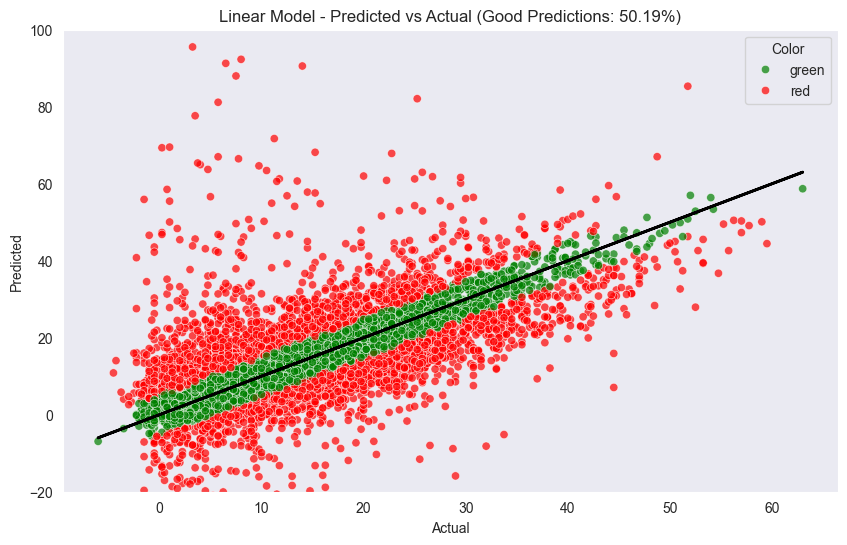

In [13]:
visu_linear_dict.plot_predicted_vs_actual()

## ANN

- Metrics without FP mean
- epochs = 50
- batch_size = 16
- loss = MAE
- metrics= MAE & MSE

In [4]:
col = ['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
       'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-']
num_games = 2
model = "ann"
player = ['LeBron James']
epochs = 50
batch_size = 16
loss = 'mae'
metrics=['mae','mse']

In [5]:
ann_dict_v1 = eng_func.fill_players_dict(season21,player,col,num_games,model,metrics=metrics)

Computing average and building model: LeBron James:   0%|          | 0/1 [00:00<?, ?it/s]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Computing average and building model: LeBron James: 100%|██████████| 1/1 [00:12<00:00, 12.95s/it]


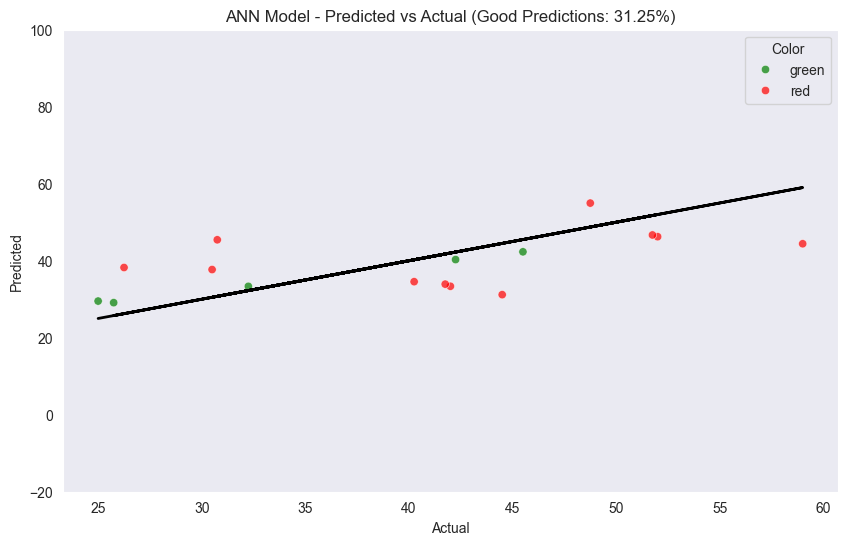

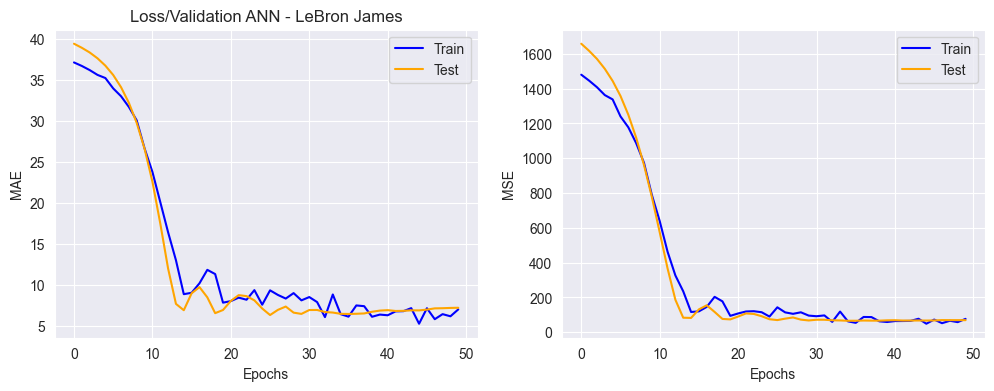

In [6]:
from Visualization.visualization import Visualization
visu_ann_dict = Visualization(ann_dict_v1,'ANN Model')
visu_ann_dict.plot_predicted_vs_actual()
visu_ann_dict.plot_ann_loss(player)

- Same execpt epochs
- epochs = 100


In [8]:
epochs = 100
batch_size = 16
loss = 'mae'
metrics=['mae','mse']
ann_dict_v1 = eng_func.fill_players_dict(season21,player,col,num_games,model,metrics=metrics,epochs=epochs)

Computing average and building model: LeBron James:   0%|          | 0/1 [00:00<?, ?it/s]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - loss: 36.7591 - mae: 36.7591 - mse: 1454.4915 - val_loss: 39.3296 - val_mae: 39.3296 - val_mse: 1647.5153
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 35.8870 - mae: 35.8870 - mse: 1379.8842 - val_loss: 38.8198 - val_mae: 38.8198 - val_mse: 1606.3385
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 35.5516 - mae: 35.5516 - mse: 1367.7080 - val_loss: 38.1926 - val_mae: 38.1926 - val_mse: 1556.3214
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 34.9789 - mae: 34.9789 - mse: 1312.8392 - val_loss: 37.3915 - val_mae: 37.3915 - val_mse: 1493.6842
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 34.5195 - mae: 34.5195 - mse: 1277.9319 - val_loss: 36.3564 - val_mae: 36.3564 - val_mse: 1414.7775
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 33.5247 - mae: 33.5247 - mse: 1211.4312 - val_loss: 35.0207 - val_mae: 35.0207 - val_mse: 1316.2595
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step -

Computing average and building model: LeBron James: 100%|██████████| 1/1 [00:25<00:00, 25.59s/it]


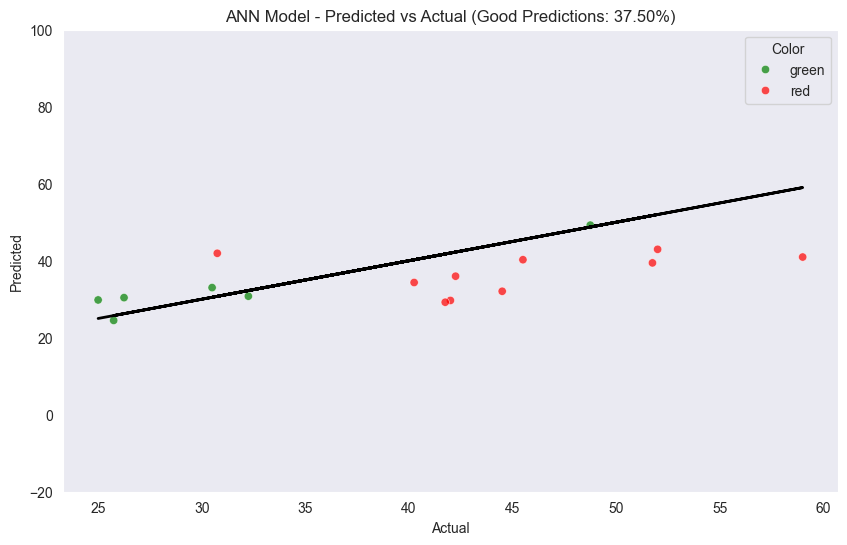

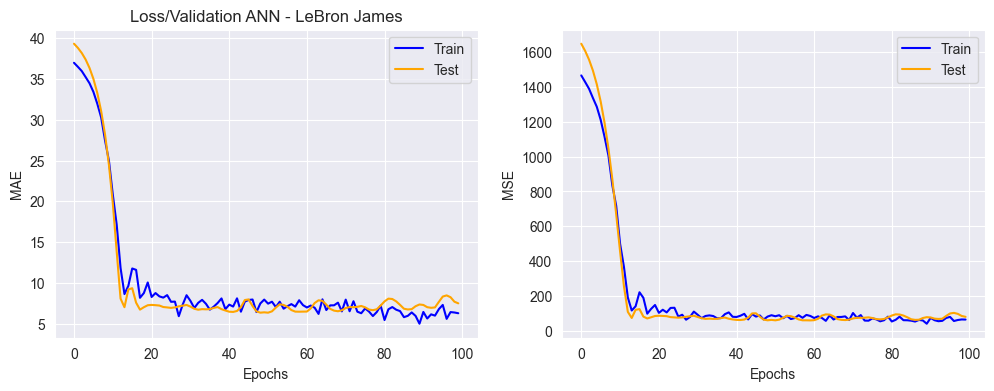

In [9]:
visu_ann_dict = Visualization(ann_dict_v1,'ANN Model')
visu_ann_dict.plot_predicted_vs_actual()
visu_ann_dict.plot_ann_loss(player[0])

- Change in Loss function
- epochs = 50
- batch_size = 16
- loss = MSE
- metrics= MAE & MSE

In [12]:
epochs = 50
batch_size = 16
loss = 'mse'
metrics=['mae','mse']
ann_dict_v1 = eng_func.fill_players_dict(season21,player,col,num_games,model,metrics=metrics,epochs=epochs,batch_size=batch_size,loss=loss)

Computing average and building model: LeBron James:   0%|          | 0/1 [00:00<?, ?it/s]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - loss: 1473.6198 - mae: 37.0061 - mse: 1473.6198 - val_loss: 1657.0571 - val_mae: 39.4482 - val_mse: 1657.0571
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 1464.3066 - mae: 36.9993 - mse: 1464.3066 - val_loss: 1620.3423 - val_mae: 38.9953 - val_mse: 1620.3423
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1433.7744 - mae: 36.6774 - mse: 1433.7744 - val_loss: 1576.1494 - val_mae: 38.4424 - val_mse: 1576.1494
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1371.3623 - mae: 35.5871 - mse: 1371.3623 - val_loss: 1520.3284 - val_mae: 37.7314 - val_mse: 1520.3284
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1294.3250 - mae: 34.5939 - mse: 1294.3250 - val_loss: 1448.1432 - val_mae: 36.7916 - val_mse: 1448.1432
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 1188.7126 - mae: 33.0870 - mse: 1188.7126 - val_loss: 1356.1653 - val_mae: 35.5568 - val_mse: 1356.1653
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━

Computing average and building model: LeBron James: 100%|██████████| 1/1 [00:15<00:00, 15.41s/it]


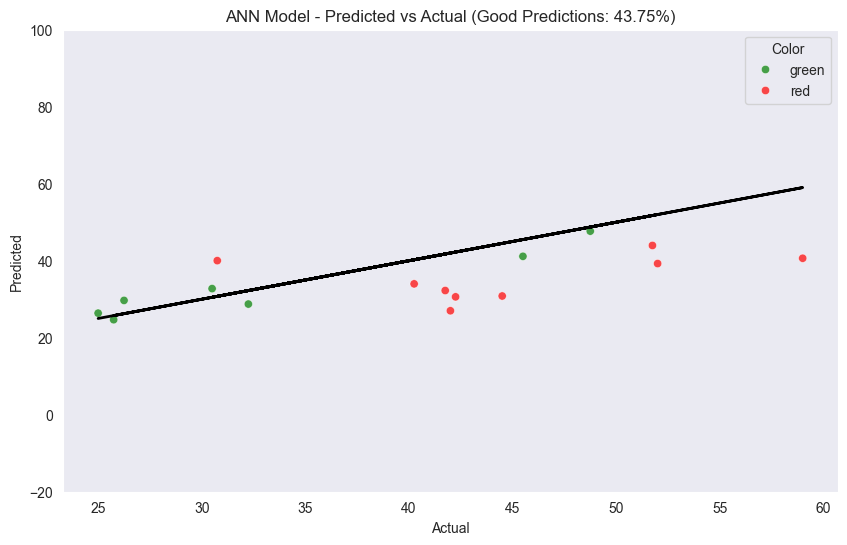

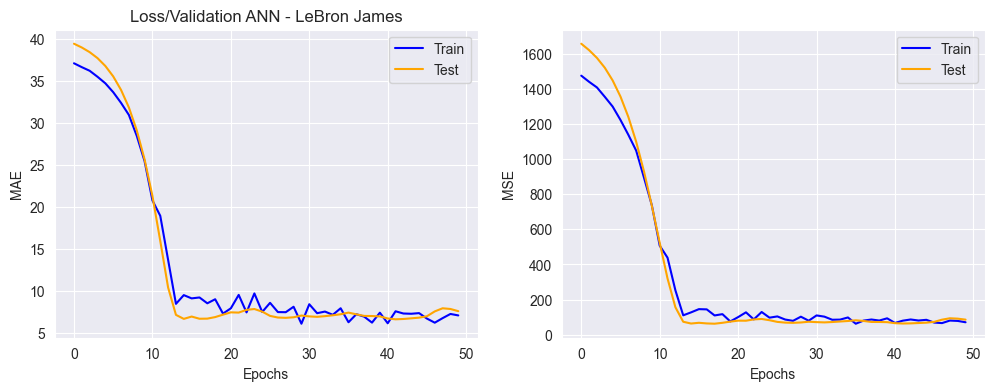

In [13]:
visu_ann_dict = Visualization(ann_dict_v1,'ANN Model')
visu_ann_dict.plot_predicted_vs_actual()
visu_ann_dict.plot_ann_loss(player[0])

In [14]:
col = ['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
       'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-','FP']
epochs = 50
batch_size = 16
loss = 'mse'
metrics = ['mae', 'mse']
ann_dict_v1 = eng_func.fill_players_dict(season21, player, col, num_games, model, metrics=metrics, epochs=epochs,
                                         batch_size=batch_size, loss=loss)

Computing average and building model: LeBron James:   0%|          | 0/1 [00:00<?, ?it/s]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - loss: 1440.6902 - mae: 36.7946 - mse: 1440.6902 - val_loss: 1650.7410 - val_mae: 39.3501 - val_mse: 1650.7410
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 1419.6367 - mae: 36.3102 - mse: 1419.6367 - val_loss: 1603.7825 - val_mae: 38.7473 - val_mse: 1603.7825
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 1420.9723 - mae: 36.4803 - mse: 1420.9723 - val_loss: 1550.1691 - val_mae: 38.0487 - val_mse: 1550.1691
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1335.5679 - mae: 35.1265 - mse: 1335.5679 - val_loss: 1485.3268 - val_mae: 37.1877 - val_mse: 1485.3268
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1302.6873 - mae: 34.7235 - mse: 1302.6873 - val_loss: 1403.1412 - val_mae: 36.0682 - val_mse: 1403.1412
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1185.8369 - mae: 32.9707 - mse: 1185.8369 - val_loss: 1297.8080 - val_mae: 34.5809 - val_mse: 1297.8080
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━

Computing average and building model: LeBron James: 100%|██████████| 1/1 [00:13<00:00, 13.81s/it]


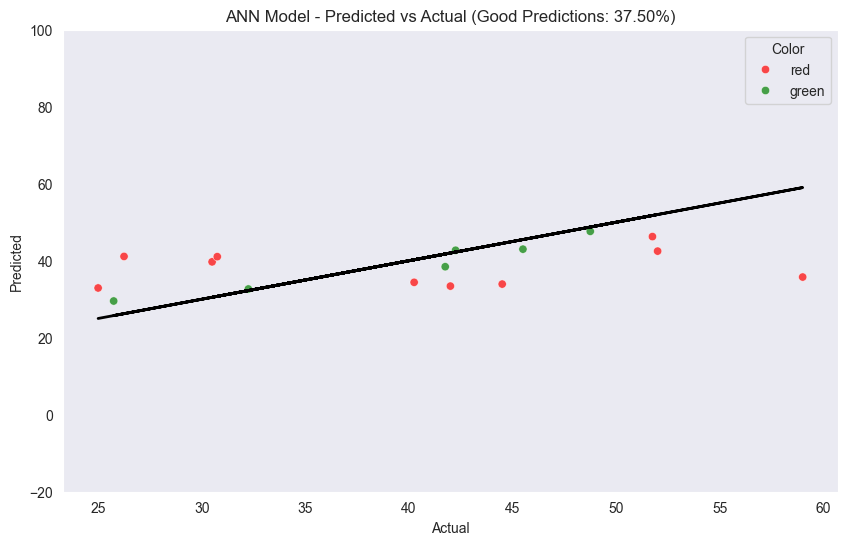

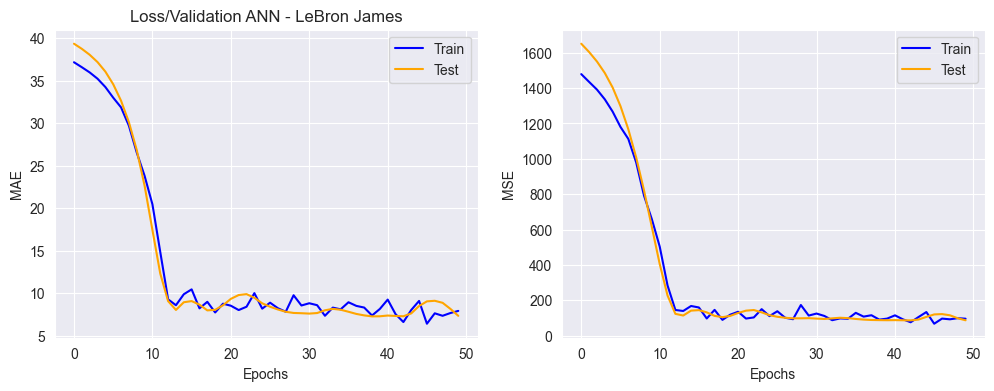

In [15]:
visu_ann_dict = Visualization(ann_dict_v1,'ANN Model')
visu_ann_dict.plot_predicted_vs_actual()
visu_ann_dict.plot_ann_loss(player[0])

### ANN for all players
- Loss : MSE

In [7]:
col = ['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
       'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-']
epochs = 35
batch_size = 16
loss = 'mse'
metrics = ['mae', 'mse']
ann_dict_v1 = eng_func.fill_players_dict(season21, players_list, col, num_games, model, metrics=metrics, epochs=epochs,
                                         batch_size=batch_size, loss=loss)

Computing average and building model: Joe Harris:   0%|          | 0/614 [00:00<?, ?it/s]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Computing average and building model: James Harden:   0%|          | 1/614 [00:07<1:18:10,  7.65s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Computing average and building model: Kevin Durant:   0%|          | 2/614 [00:15<1:21:15,  7.97s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Computing average and building model: Nic Claxton:   0%|          | 3/614 [00:23<1:18:55,  7.75s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Computing average and building model: Blake Griffin:   1%|          | 4/614 [00:30<1:15:48,  7.46s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Computing average and building model: Patty Mills:   1%|          | 5/614 [00:37<1:14:49,  7.37s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Computing average and building model: James Johnson:   1%|          | 6/614 [00:46<1:20:35,  7.95s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Computing average and building model: Jevon Carter:   1%|          | 7/614 [00:53<1:16:54,  7.60s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Computing average and building model: LaMarcus Aldridge:   1%|▏         | 8/614 [01:01<1:16:24,  7.57s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Computing average and building model: Paul Millsap:   1%|▏         | 9/614 [01:10<1:21:57,  8.13s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Computing average and building model: Cam Thomas:   2%|▏         | 10/614 [01:18<1:20:55,  8.04s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Computing average and building model: DeAndre' Bembry:   2%|▏         | 11/614 [01:28<1:26:38,  8.62s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Computing average and building model: Bruce Brown:   2%|▏         | 12/614 [01:42<1:42:29, 10.22s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Computing average and building model: David Duke Jr.:   2%|▏         | 13/614 [01:52<1:41:46, 10.16s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Kessler Edwards:   2%|▏         | 14/614 [01:58<1:30:52,  9.09s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Computing average and building model: Giannis Antetokounmpo:   2%|▏         | 15/614 [02:05<1:22:51,  8.30s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Computing average and building model: Khris Middleton:   3%|▎         | 16/614 [02:11<1:18:15,  7.85s/it]      /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Computing average and building model: Brook Lopez:   3%|▎         | 17/614 [02:18<1:14:19,  7.47s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Computing average and building model: Grayson Allen:   3%|▎         | 18/614 [02:26<1:14:23,  7.49s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: Jrue Holiday:   3%|▎         | 19/614 [02:32<1:11:56,  7.26s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Computing average and building model: Pat Connaughton:   3%|▎         | 20/614 [02:41<1:17:00,  7.78s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Jordan Nwora:   3%|▎         | 21/614 [02:50<1:19:02,  8.00s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Computing average and building model: George Hill:   4%|▎         | 22/614 [02:57<1:17:39,  7.87s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Computing average and building model: Thanasis Antetokounmpo:   4%|▎         | 23/614 [03:04<1:12:47,  7.39s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Sandro Mamukelashvili:   4%|▍         | 24/614 [03:10<1:09:09,  7.03s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Computing average and building model: Justin Robinson:   4%|▍         | 25/614 [03:16<1:07:57,  6.92s/it]      /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Computing average and building model: Georgios Kalaitzakis:   4%|▍         | 26/614 [03:23<1:06:39,  6.80s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Computing average and building model: Stephen Curry:   4%|▍         | 27/614 [03:29<1:05:24,  6.69s/it]       /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Computing average and building model: Draymond Green:   5%|▍         | 28/614 [03:36<1:05:26,  6.70s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Computing average and building model: Andrew Wiggins:   5%|▍         | 29/614 [03:43<1:05:24,  6.71s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Jordan Poole:   5%|▍         | 30/614 [03:50<1:07:11,  6.90s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Computing average and building model: Kevon Looney:   5%|▌         | 31/614 [03:57<1:07:33,  6.95s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Computing average and building model: Damion Lee:   5%|▌         | 32/614 [04:04<1:07:17,  6.94s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Computing average and building model: Nemanja Bjelica:   5%|▌         | 33/614 [04:11<1:07:17,  6.95s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Computing average and building model: Andre Iguodala:   6%|▌         | 34/614 [04:18<1:06:41,  6.90s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Computing average and building model: Juan Toscano-Anderson:   6%|▌         | 35/614 [04:24<1:04:17,  6.66s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Computing average and building model: Otto Porter Jr.:   6%|▌         | 36/614 [04:30<1:03:21,  6.58s/it]      /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Moses Moody:   6%|▌         | 37/614 [04:36<1:01:06,  6.35s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Gary Payton II:   6%|▌         | 38/614 [04:43<1:00:57,  6.35s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Anthony Davis:   6%|▋         | 39/614 [04:49<1:00:54,  6.36s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Computing average and building model: LeBron James:   7%|▋         | 40/614 [04:55<59:19,  6.20s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Russell Westbrook:   7%|▋         | 41/614 [05:00<57:27,  6.02s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Kent Bazemore:   7%|▋         | 42/614 [05:07<58:55,  6.18s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Computing average and building model: DeAndre Jordan:   7%|▋         | 43/614 [05:13<57:13,  6.01s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Carmelo Anthony:   7%|▋         | 44/614 [05:18<56:20,  5.93s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Rajon Rondo:   7%|▋         | 45/614 [05:24<55:44,  5.88s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Malik Monk:   7%|▋         | 46/614 [05:30<55:08,  5.83s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Computing average and building model: Dwight Howard:   8%|▊         | 47/614 [05:36<55:01,  5.82s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Avery Bradley:   8%|▊         | 48/614 [05:41<55:01,  5.83s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Computing average and building model: Austin Reaves:   8%|▊         | 49/614 [05:47<54:35,  5.80s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Malcolm Brogdon:   8%|▊         | 51/614 [05:53<41:40,  4.44s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Computing average and building model: Domantas Sabonis:   8%|▊         | 52/614 [05:59<44:32,  4.75s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Chris Duarte:   9%|▊         | 53/614 [06:04<47:07,  5.04s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Myles Turner:   9%|▉         | 54/614 [06:10<48:39,  5.21s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Justin Holiday:   9%|▉         | 55/614 [06:16<49:45,  5.34s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Torrey Craig:   9%|▉         | 56/614 [06:22<51:33,  5.54s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Jeremy Lamb:   9%|▉         | 57/614 [06:29<54:42,  5.89s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Computing average and building model: T.J. McConnell:   9%|▉         | 58/614 [06:34<53:09,  5.74s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Goga Bitadze:  10%|▉         | 59/614 [06:40<52:29,  5.67s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Oshae Brissett:  10%|▉         | 60/614 [06:45<52:08,  5.65s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Computing average and building model: Isaiah Jackson:  10%|▉         | 61/614 [06:51<52:46,  5.73s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Computing average and building model: Brad Wanamaker:  10%|█         | 62/614 [06:57<52:22,  5.69s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Duane Washington Jr.:  10%|█         | 63/614 [07:02<51:52,  5.65s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Gordon Hayward:  10%|█         | 64/614 [07:08<51:58,  5.67s/it]      /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Kelly Oubre Jr.:  11%|█         | 65/614 [07:14<51:46,  5.66s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Computing average and building model: Miles Bridges:  11%|█         | 66/614 [07:19<52:24,  5.74s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Mason Plumlee:  11%|█         | 67/614 [07:25<52:21,  5.74s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Computing average and building model: LaMelo Ball:  11%|█         | 68/614 [07:33<57:21,  6.30s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Computing average and building model: Cody Martin:  11%|█         | 69/614 [07:42<1:06:11,  7.29s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Computing average and building model: Ish Smith:  11%|█▏        | 70/614 [07:52<1:12:34,  8.01s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Computing average and building model: P.J. Washington:  12%|█▏        | 71/614 [08:01<1:14:57,  8.28s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Computing average and building model: Jalen McDaniels:  12%|█▏        | 72/614 [08:09<1:13:43,  8.16s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Computing average and building model: James Bouknight:  12%|█▏        | 73/614 [08:15<1:09:15,  7.68s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Computing average and building model: Vernon Carey Jr.:  12%|█▏        | 74/614 [08:22<1:05:36,  7.29s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Computing average and building model: Kai Jones:  12%|█▏        | 75/614 [08:29<1:05:40,  7.31s/it]       /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Nick Richards:  12%|█▏        | 76/614 [08:35<1:01:14,  6.83s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: JT Thor:  13%|█▎        | 78/614 [08:40<44:25,  4.97s/it]        /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: DeMar DeRozan:  13%|█▎        | 79/614 [08:46<45:24,  5.09s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Computing average and building model: Nikola Vučević:  13%|█▎        | 80/614 [08:52<46:39,  5.24s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Zach LaVine:  13%|█▎        | 81/614 [08:57<47:49,  5.38s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Computing average and building model: Lonzo Ball:  13%|█▎        | 82/614 [09:03<48:59,  5.52s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Patrick Williams:  14%|█▎        | 83/614 [09:09<49:20,  5.58s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Alex Caruso:  14%|█▎        | 84/614 [09:14<48:56,  5.54s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Computing average and building model: Javonte Green:  14%|█▍        | 85/614 [09:20<49:34,  5.62s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Alize Johnson:  14%|█▍        | 86/614 [09:26<50:04,  5.69s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Ayo Dosunmu:  14%|█▍        | 87/614 [09:32<49:37,  5.65s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Troy Brown Jr.:  14%|█▍        | 88/614 [09:37<49:37,  5.66s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Computing average and building model: Tony Bradley:  14%|█▍        | 89/614 [09:43<50:13,  5.74s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Computing average and building model: Derrick Jones Jr.:  15%|█▍        | 90/614 [09:49<49:11,  5.63s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Marko Simonovic:  15%|█▍        | 91/614 [09:54<49:23,  5.67s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Matt Thomas:  15%|█▍        | 92/614 [10:00<49:10,  5.65s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Saddiq Bey:  15%|█▌        | 93/614 [10:06<48:52,  5.63s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Jerami Grant:  15%|█▌        | 94/614 [10:12<49:56,  5.76s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Computing average and building model: Frank Jackson:  15%|█▌        | 95/614 [10:17<49:26,  5.72s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Computing average and building model: Isaiah Stewart:  16%|█▌        | 96/614 [10:23<49:26,  5.73s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Computing average and building model: Killian Hayes:  16%|█▌        | 97/614 [10:30<53:36,  6.22s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Cory Joseph:  16%|█▌        | 98/614 [10:36<52:27,  6.10s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Kelly Olynyk:  16%|█▌        | 99/614 [10:42<51:48,  6.04s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Computing average and building model: Josh Jackson:  16%|█▋        | 100/614 [10:48<50:35,  5.91s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Trey Lyles:  16%|█▋        | 101/614 [10:53<49:50,  5.83s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Computing average and building model: Hamidou Diallo:  17%|█▋        | 102/614 [10:59<49:43,  5.83s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Luka Garza:  17%|█▋        | 103/614 [11:05<49:51,  5.85s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Computing average and building model: Saben Lee:  17%|█▋        | 104/614 [11:11<49:39,  5.84s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Rodney McGruder:  17%|█▋        | 105/614 [11:17<49:00,  5.78s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Computing average and building model: Jamorko Pickett:  17%|█▋        | 106/614 [11:22<48:51,  5.77s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: Jaylen Brown:  17%|█▋        | 107/614 [11:28<47:55,  5.67s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Marcus Smart:  18%|█▊        | 108/614 [11:34<48:17,  5.73s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Robert Williams:  18%|█▊        | 109/614 [11:39<48:27,  5.76s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Computing average and building model: Jayson Tatum:  18%|█▊        | 110/614 [11:45<48:39,  5.79s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Computing average and building model: Grant Williams:  18%|█▊        | 111/614 [11:51<48:35,  5.80s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Dennis Schröder:  18%|█▊        | 112/614 [11:57<48:35,  5.81s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Romeo Langford:  18%|█▊        | 113/614 [12:03<48:30,  5.81s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Aaron Nesmith:  19%|█▊        | 114/614 [12:08<48:02,  5.76s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Payton Pritchard:  19%|█▊        | 115/614 [12:14<47:47,  5.75s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Bruno Fernando:  19%|█▉        | 116/614 [12:20<47:49,  5.76s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: Sam Hauser:  19%|█▉        | 117/614 [12:25<47:14,  5.70s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: Juancho Hernangómez:  19%|█▉        | 118/614 [12:31<46:43,  5.65s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Computing average and building model: Enes Freedom:  19%|█▉        | 119/614 [12:37<46:39,  5.66s/it]       /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Computing average and building model: Jabari Parker:  20%|█▉        | 120/614 [12:42<46:54,  5.70s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Brodric Thomas:  20%|█▉        | 121/614 [12:48<46:21,  5.64s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Kyle Kuzma:  20%|█▉        | 122/614 [12:53<45:49,  5.59s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Bradley Beal:  20%|██        | 123/614 [13:01<51:35,  6.31s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Kentavious Caldwell-Pope:  20%|██        | 124/614 [13:07<49:57,  6.12s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Spencer Dinwiddie:  20%|██        | 125/614 [13:14<52:25,  6.43s/it]       /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Daniel Gafford:  21%|██        | 126/614 [13:20<50:59,  6.27s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Montrezl Harrell:  21%|██        | 127/614 [13:26<49:45,  6.13s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Raul Neto:  21%|██        | 128/614 [13:32<48:48,  6.03s/it]       /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Deni Avdija:  21%|██        | 129/614 [13:38<48:17,  5.97s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Computing average and building model: Dāvis Bertāns:  21%|██        | 130/614 [13:44<49:24,  6.12s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Computing average and building model: Aaron Holiday:  21%|██▏       | 131/614 [13:50<49:38,  6.17s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Computing average and building model: Anthony Gill:  21%|██▏       | 132/614 [13:57<50:18,  6.26s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Computing average and building model: Corey Kispert:  22%|██▏       | 133/614 [14:03<50:43,  6.33s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Computing average and building model: Isaiah Todd:  22%|██▏       | 134/614 [14:10<51:35,  6.45s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Computing average and building model: Fred VanVleet:  22%|██▏       | 135/614 [14:16<49:54,  6.25s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: OG Anunoby:  22%|██▏       | 136/614 [14:22<49:20,  6.19s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Scottie Barnes:  22%|██▏       | 137/614 [14:28<48:14,  6.07s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Goran Dragić:  22%|██▏       | 138/614 [14:33<47:26,  5.98s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Precious Achiuwa:  23%|██▎       | 139/614 [14:39<46:18,  5.85s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Gary Trent Jr.:  23%|██▎       | 140/614 [14:45<46:19,  5.86s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Khem Birch:  23%|██▎       | 141/614 [14:51<46:11,  5.86s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Chris Boucher:  23%|██▎       | 142/614 [14:56<45:37,  5.80s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Svi Mykhailiuk:  23%|██▎       | 143/614 [15:02<45:27,  5.79s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Computing average and building model: Dalano Banton:  23%|██▎       | 144/614 [15:08<45:22,  5.79s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Isaac Bonga:  24%|██▎       | 145/614 [15:14<45:32,  5.83s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Justin Champagnie:  24%|██▍       | 146/614 [15:19<44:47,  5.74s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Malachi Flynn:  24%|██▍       | 147/614 [15:25<44:43,  5.75s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Evan Mobley:  24%|██▍       | 149/614 [15:31<34:14,  4.42s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Darius Garland:  25%|██▍       | 151/614 [15:37<29:30,  3.82s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Lauri Markkanen:  25%|██▍       | 152/614 [15:43<32:49,  4.26s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Collin Sexton:  25%|██▍       | 153/614 [15:48<35:18,  4.59s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Computing average and building model: Jarrett Allen:  25%|██▌       | 154/614 [15:54<36:55,  4.82s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Ricky Rubio:  25%|██▌       | 155/614 [16:00<39:07,  5.11s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Computing average and building model: Isaac Okoro:  25%|██▌       | 156/614 [16:05<40:06,  5.25s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Kevin Love:  26%|██▌       | 157/614 [16:15<49:47,  6.54s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Cedi Osman:  26%|██▌       | 158/614 [16:21<48:25,  6.37s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Ed Davis:  26%|██▌       | 159/614 [16:27<47:20,  6.24s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: Tacko Fall:  26%|██▌       | 160/614 [16:32<45:29,  6.01s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: RJ Nembhard Jr.:  26%|██▌       | 161/614 [16:38<44:17,  5.87s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Computing average and building model: Kevin Pangos:  26%|██▋       | 162/614 [16:43<43:21,  5.76s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Lamar Stevens:  27%|██▋       | 163/614 [16:49<42:57,  5.72s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Denzel Valentine:  27%|██▋       | 164/614 [16:54<42:25,  5.66s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Ja Morant:  27%|██▋       | 165/614 [17:00<41:57,  5.61s/it]       /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Steven Adams:  27%|██▋       | 166/614 [17:06<41:51,  5.61s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Computing average and building model: Jaren Jackson Jr.:  27%|██▋       | 167/614 [17:11<42:24,  5.69s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: De'Anthony Melton:  27%|██▋       | 168/614 [17:17<42:47,  5.76s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Desmond Bane:  28%|██▊       | 169/614 [17:23<42:44,  5.76s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Kyle Anderson:  28%|██▊       | 170/614 [17:29<42:54,  5.80s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: John Konchar:  28%|██▊       | 171/614 [17:35<42:48,  5.80s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Computing average and building model: Ziaire Williams:  28%|██▊       | 172/614 [17:41<43:18,  5.88s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Tyus Jones:  28%|██▊       | 173/614 [17:47<42:59,  5.85s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Brandon Clarke:  28%|██▊       | 174/614 [17:53<42:51,  5.84s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: Santi Aldama:  29%|██▊       | 175/614 [17:58<42:47,  5.85s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Jarrett Culver:  29%|██▊       | 176/614 [18:04<42:16,  5.79s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Computing average and building model: Sam Merrill:  29%|██▉       | 177/614 [18:10<43:07,  5.92s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: Killian Tillie:  29%|██▉       | 178/614 [18:16<42:10,  5.80s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Computing average and building model: Xavier Tillman Sr.:  29%|██▉       | 179/614 [18:21<41:44,  5.76s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Jalen Green:  29%|██▉       | 180/614 [18:27<41:19,  5.71s/it]       /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Christian Wood:  29%|██▉       | 181/614 [18:33<41:38,  5.77s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Kevin Porter Jr.:  30%|██▉       | 182/614 [18:39<41:44,  5.80s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Jae'Sean Tate:  30%|██▉       | 183/614 [18:44<41:10,  5.73s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Daniel Theis:  30%|██▉       | 184/614 [18:50<40:49,  5.70s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Eric Gordon:  30%|███       | 185/614 [18:56<40:28,  5.66s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Alperen Sengun:  30%|███       | 186/614 [19:01<40:41,  5.70s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: David Nwaba:  30%|███       | 187/614 [19:07<40:54,  5.75s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: D.J. Augustin:  31%|███       | 188/614 [19:13<40:43,  5.73s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Computing average and building model: KJ Martin:  31%|███       | 189/614 [19:18<39:52,  5.63s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Armoni Brooks:  31%|███       | 190/614 [19:24<39:44,  5.62s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Josh Christopher:  31%|███       | 191/614 [19:30<39:43,  5.64s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Usman Garuba:  31%|███▏      | 192/614 [19:35<40:01,  5.69s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Anthony Edwards:  31%|███▏      | 193/614 [19:41<39:45,  5.67s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Computing average and building model: Karl-Anthony Towns:  32%|███▏      | 194/614 [19:47<40:16,  5.75s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: Jaden McDaniels:  32%|███▏      | 195/614 [19:53<40:26,  5.79s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Computing average and building model: D'Angelo Russell:  32%|███▏      | 196/614 [19:59<42:04,  6.04s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Computing average and building model: Josh Okogie:  32%|███▏      | 197/614 [20:10<51:17,  7.38s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Computing average and building model: Malik Beasley:  32%|███▏      | 198/614 [20:17<49:22,  7.12s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Computing average and building model: Jordan McLaughlin:  32%|███▏      | 199/614 [20:23<48:47,  7.05s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: Naz Reid:  33%|███▎      | 200/614 [20:29<46:10,  6.69s/it]         /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Taurean Prince:  33%|███▎      | 201/614 [20:35<43:44,  6.35s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Jarred Vanderbilt:  33%|███▎      | 202/614 [20:41<42:42,  6.22s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Jaylen Nowell:  33%|███▎      | 203/614 [20:46<41:41,  6.09s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Leandro Bolmaro:  33%|███▎      | 204/614 [20:52<41:19,  6.05s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Jake Layman:  33%|███▎      | 205/614 [20:58<40:27,  5.93s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Patrick Beverley:  34%|███▎      | 206/614 [21:04<40:06,  5.90s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Tyrese Maxey:  34%|███▍      | 208/614 [21:10<30:15,  4.47s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Tobias Harris:  34%|███▍      | 209/614 [21:16<32:44,  4.85s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Seth Curry:  34%|███▍      | 210/614 [21:21<34:35,  5.14s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Joel Embiid:  34%|███▍      | 211/614 [21:27<35:58,  5.36s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Danny Green:  35%|███▍      | 212/614 [21:33<36:50,  5.50s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Matisse Thybulle:  35%|███▍      | 213/614 [21:39<37:01,  5.54s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Furkan Korkmaz:  35%|███▍      | 214/614 [21:45<37:31,  5.63s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Andre Drummond:  35%|███▌      | 215/614 [21:51<37:53,  5.70s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Georges Niang:  35%|███▌      | 216/614 [21:57<38:20,  5.78s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Isaiah Joe:  35%|███▌      | 217/614 [22:03<38:39,  5.84s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Paul Reed:  36%|███▌      | 218/614 [22:08<38:25,  5.82s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Computing average and building model: Charles Bassey:  36%|███▌      | 219/614 [22:14<37:58,  5.77s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Computing average and building model: Aaron Henry:  36%|███▌      | 220/614 [22:20<37:22,  5.69s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Brandon Ingram:  36%|███▌      | 221/614 [22:25<37:01,  5.65s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Nickeil Alexander-Walker:  36%|███▋      | 223/614 [22:31<28:26,  4.36s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Jonas Valančiūnas:  36%|███▋      | 224/614 [22:37<30:46,  4.73s/it]       /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Devonte' Graham:  37%|███▋      | 225/614 [22:43<33:10,  5.12s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Josh Hart:  37%|███▋      | 226/614 [22:49<34:22,  5.31s/it]      /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Naji Marshall:  37%|███▋      | 227/614 [22:55<35:14,  5.46s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Jaxson Hayes:  37%|███▋      | 228/614 [23:00<34:54,  5.43s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Trey Murphy III:  37%|███▋      | 229/614 [23:06<35:38,  5.55s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Computing average and building model: Kira Lewis Jr.:  37%|███▋      | 230/614 [23:11<35:40,  5.58s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Garrett Temple:  38%|███▊      | 231/614 [23:17<35:33,  5.57s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Tomáš Satoranský:  38%|███▊      | 232/614 [23:23<35:55,  5.64s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Herbert Jones:  38%|███▊      | 233/614 [23:29<36:13,  5.70s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Jose Alvarado:  38%|███▊      | 234/614 [23:35<36:37,  5.78s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Willy Hernangómez:  38%|███▊      | 235/614 [23:40<36:09,  5.72s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Franz Wagner:  38%|███▊      | 236/614 [23:46<36:15,  5.76s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Jalen Suggs:  39%|███▉      | 238/614 [23:52<27:54,  4.45s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Cole Anthony:  39%|███▉      | 239/614 [23:58<29:44,  4.76s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Mo Bamba:  39%|███▉      | 240/614 [24:03<31:20,  5.03s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Wendell Carter Jr.:  39%|███▉      | 241/614 [24:09<32:40,  5.26s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Terrence Ross:  39%|███▉      | 242/614 [24:15<33:37,  5.42s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Computing average and building model: R.J. Hampton:  40%|███▉      | 243/614 [24:21<34:12,  5.53s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Ignas Brazdeikis:  40%|███▉      | 244/614 [24:26<34:14,  5.55s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Moritz Wagner:  40%|███▉      | 245/614 [24:32<34:18,  5.58s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Robin Lopez:  40%|████      | 246/614 [24:38<34:23,  5.61s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: Gary Harris:  40%|████      | 247/614 [24:43<34:26,  5.63s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Dejounte Murray:  40%|████      | 248/614 [24:55<45:52,  7.52s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Derrick White:  41%|████      | 250/614 [25:01<32:53,  5.42s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Jakob Poeltl:  41%|████      | 251/614 [25:07<33:30,  5.54s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Keldon Johnson:  41%|████      | 252/614 [25:13<34:07,  5.66s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Doug McDermott:  41%|████      | 253/614 [25:19<34:18,  5.70s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Lonnie Walker IV:  41%|████▏     | 254/614 [25:25<34:05,  5.68s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Devin Vassell:  42%|████▏     | 255/614 [25:30<34:11,  5.71s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Drew Eubanks:  42%|████▏     | 256/614 [25:36<34:15,  5.74s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Keita Bates-Diop:  42%|████▏     | 257/614 [25:42<34:12,  5.75s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Tre Jones:  42%|████▏     | 258/614 [25:48<34:02,  5.74s/it]       /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Bryn Forbes:  42%|████▏     | 259/614 [25:54<34:19,  5.80s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Joshua Primo:  42%|████▏     | 260/614 [26:00<34:16,  5.81s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Jock Landale:  43%|████▎     | 261/614 [26:05<33:41,  5.73s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Computing average and building model: Shai Gilgeous-Alexander:  43%|████▎     | 262/614 [26:11<33:53,  5.78s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Darius Bazley:  43%|████▎     | 263/614 [26:17<34:19,  5.87s/it]          /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Luguentz Dort:  43%|████▎     | 264/614 [26:24<35:50,  6.14s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Josh Giddey:  43%|████▎     | 265/614 [26:30<35:44,  6.14s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Computing average and building model: Derrick Favors:  43%|████▎     | 266/614 [26:36<35:59,  6.21s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: Théo Maledon:  43%|████▎     | 267/614 [26:43<36:09,  6.25s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Kenrich Williams:  44%|████▎     | 268/614 [26:48<34:39,  6.01s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Aleksej Pokusevski:  44%|████▍     | 269/614 [26:54<33:30,  5.83s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Computing average and building model: Tre Mann:  44%|████▍     | 270/614 [26:59<33:24,  5.83s/it]          /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Isaiah Roby:  44%|████▍     | 271/614 [27:05<33:11,  5.81s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Jeremiah Robinson-Earl:  44%|████▍     | 272/614 [27:11<32:49,  5.76s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Computing average and building model: Vit Krejci:  44%|████▍     | 273/614 [27:16<32:30,  5.72s/it]            /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Gabriel Deck:  45%|████▍     | 274/614 [27:22<32:08,  5.67s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Ty Jerome:  45%|████▍     | 275/614 [27:27<31:42,  5.61s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Mike Muscala:  45%|████▍     | 276/614 [27:33<31:40,  5.62s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Computing average and building model: Rudy Gobert:  45%|████▌     | 277/614 [27:39<31:46,  5.66s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Donovan Mitchell:  45%|████▌     | 278/614 [27:45<32:08,  5.74s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Bojan Bogdanović:  45%|████▌     | 279/614 [27:51<32:10,  5.76s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Royce O'Neale:  46%|████▌     | 280/614 [27:56<32:14,  5.79s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Mike Conley:  46%|████▌     | 281/614 [28:02<32:29,  5.85s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Jordan Clarkson:  46%|████▌     | 282/614 [28:08<32:25,  5.86s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Joe Ingles:  46%|████▌     | 283/614 [28:14<32:24,  5.87s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Hassan Whiteside:  46%|████▋     | 284/614 [28:20<32:20,  5.88s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Eric Paschall:  46%|████▋     | 285/614 [28:26<32:03,  5.85s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Jared Butler:  47%|████▋     | 286/614 [28:32<31:35,  5.78s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Elijah Hughes:  47%|████▋     | 287/614 [28:37<31:10,  5.72s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Computing average and building model: Malik Fitts:  47%|████▋     | 288/614 [28:43<31:01,  5.71s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Miye Oni:  47%|████▋     | 289/614 [28:49<31:14,  5.77s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Udoka Azubuike:  47%|████▋     | 290/614 [28:54<30:41,  5.68s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Computing average and building model: Harrison Barnes:  47%|████▋     | 291/614 [29:00<30:28,  5.66s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: De'Aaron Fox:  48%|████▊     | 292/614 [29:05<30:11,  5.63s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Richaun Holmes:  48%|████▊     | 293/614 [29:11<30:25,  5.69s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Computing average and building model: Tyrese Haliburton:  48%|████▊     | 294/614 [29:17<30:09,  5.65s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Maurice Harkless:  48%|████▊     | 295/614 [29:22<30:08,  5.67s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Buddy Hield:  48%|████▊     | 296/614 [29:28<29:57,  5.65s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Davion Mitchell:  48%|████▊     | 297/614 [29:34<30:25,  5.76s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Tristan Thompson:  49%|████▊     | 298/614 [29:40<30:31,  5.80s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Terence Davis:  49%|████▊     | 299/614 [29:46<30:16,  5.77s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Marvin Bagley III:  49%|████▉     | 300/614 [29:51<29:55,  5.72s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Damian Jones:  49%|████▉     | 301/614 [29:57<29:47,  5.71s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Alex Len:  49%|████▉     | 302/614 [30:03<29:33,  5.68s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Chimezie Metu:  49%|████▉     | 303/614 [30:08<29:21,  5.66s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Robert Woodard II:  50%|████▉     | 304/614 [30:14<29:06,  5.63s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Damian Lillard:  50%|████▉     | 305/614 [30:19<28:39,  5.57s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: CJ McCollum:  50%|████▉     | 306/614 [30:25<28:39,  5.58s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Norman Powell:  50%|█████     | 307/614 [30:31<28:57,  5.66s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Robert Covington:  50%|█████     | 308/614 [30:44<40:48,  8.00s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Jusuf Nurkić:  50%|█████     | 309/614 [30:50<37:43,  7.42s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Cody Zeller:  50%|█████     | 310/614 [30:56<35:19,  6.97s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Computing average and building model: Anfernee Simons:  51%|█████     | 311/614 [31:02<33:35,  6.65s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Larry Nance Jr.:  51%|█████     | 312/614 [31:08<32:21,  6.43s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Nassir Little:  51%|█████     | 313/614 [31:14<31:12,  6.22s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Computing average and building model: Greg Brown III:  51%|█████     | 314/614 [31:20<30:55,  6.18s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Computing average and building model: CJ Elleby:  51%|█████▏    | 315/614 [31:25<30:06,  6.04s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Ben McLemore:  51%|█████▏    | 316/614 [31:31<29:48,  6.00s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Dennis Smith Jr.:  52%|█████▏    | 317/614 [31:37<29:00,  5.86s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Nikola Jokić:  52%|█████▏    | 318/614 [31:42<28:32,  5.78s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Michael Porter Jr.:  52%|█████▏    | 319/614 [31:48<28:24,  5.78s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Computing average and building model: Will Barton:  52%|█████▏    | 320/614 [31:54<27:52,  5.69s/it]       /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Aaron Gordon:  52%|█████▏    | 321/614 [31:59<27:54,  5.72s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Monte Morris:  52%|█████▏    | 322/614 [32:06<28:44,  5.91s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Computing average and building model: PJ Dozier:  53%|█████▎    | 323/614 [32:12<29:25,  6.07s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Facundo Campazzo:  53%|█████▎    | 324/614 [32:19<29:50,  6.17s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Jeff Green:  53%|█████▎    | 325/614 [32:26<30:50,  6.40s/it]      /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Computing average and building model: JaMychal Green:  53%|█████▎    | 326/614 [32:32<30:54,  6.44s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Austin Rivers:  53%|█████▎    | 327/614 [32:39<30:56,  6.47s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Bol Bol:  53%|█████▎    | 328/614 [32:45<30:19,  6.36s/it]      /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Petr Cornelie:  54%|█████▎    | 329/614 [32:50<28:56,  6.09s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Markus Howard:  54%|█████▎    | 330/614 [32:56<27:59,  5.91s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Computing average and building model: Bones Hyland:  54%|█████▍    | 331/614 [33:05<32:22,  6.86s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Zeke Nnaji:  54%|█████▍    | 332/614 [33:11<31:34,  6.72s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Chris Paul:  54%|█████▍    | 333/614 [33:17<30:08,  6.43s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Mikal Bridges:  54%|█████▍    | 334/614 [33:23<29:07,  6.24s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Deandre Ayton:  55%|█████▍    | 335/614 [33:29<28:38,  6.16s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Devin Booker:  55%|█████▍    | 336/614 [33:34<27:47,  6.00s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Jae Crowder:  55%|█████▍    | 337/614 [33:40<27:29,  5.95s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Cameron Johnson:  55%|█████▌    | 338/614 [33:46<27:21,  5.95s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Landry Shamet:  55%|█████▌    | 339/614 [33:52<27:03,  5.91s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: JaVale McGee:  55%|█████▌    | 340/614 [33:58<26:53,  5.89s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Computing average and building model: Cameron Payne:  56%|█████▌    | 341/614 [34:04<26:45,  5.88s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Abdel Nader:  56%|█████▌    | 342/614 [34:09<26:14,  5.79s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Computing average and building model: Chandler Hutchison:  56%|█████▌    | 343/614 [34:15<25:48,  5.71s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Computing average and building model: Frank Kaminsky:  56%|█████▌    | 344/614 [34:20<25:21,  5.64s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Elfrid Payton:  56%|█████▌    | 345/614 [34:26<25:14,  5.63s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Jalen Smith:  56%|█████▋    | 346/614 [34:31<25:05,  5.62s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Computing average and building model: Luka Dončić:  57%|█████▋    | 347/614 [34:37<25:12,  5.67s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Computing average and building model: Kristaps Porziņģis:  57%|█████▋    | 348/614 [34:43<25:17,  5.70s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Dorian Finney-Smith:  57%|█████▋    | 349/614 [34:49<25:15,  5.72s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Computing average and building model: Tim Hardaway Jr.:  57%|█████▋    | 350/614 [34:55<25:31,  5.80s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Dwight Powell:  57%|█████▋    | 351/614 [35:00<25:17,  5.77s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Jalen Brunson:  57%|█████▋    | 352/614 [35:07<25:39,  5.88s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Maxi Kleber:  57%|█████▋    | 353/614 [35:13<25:53,  5.95s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Reggie Bullock:  58%|█████▊    | 354/614 [35:19<25:49,  5.96s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Computing average and building model: Willie Cauley-Stein:  58%|█████▊    | 355/614 [35:25<25:47,  5.98s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Sterling Brown:  58%|█████▊    | 356/614 [35:30<25:12,  5.86s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Trey Burke:  58%|█████▊    | 357/614 [35:36<24:55,  5.82s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Computing average and building model: Josh Green:  58%|█████▊    | 358/614 [35:43<26:53,  6.30s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Frank Ntilikina:  58%|█████▊    | 359/614 [35:50<26:29,  6.23s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Computing average and building model: Moses Brown:  59%|█████▊    | 360/614 [35:55<25:36,  6.05s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Boban Marjanović:  59%|█████▉    | 361/614 [36:01<25:08,  5.96s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Trae Young:  59%|█████▉    | 362/614 [36:06<24:29,  5.83s/it]      /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: John Collins:  59%|█████▉    | 363/614 [36:12<24:03,  5.75s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: De'Andre Hunter:  59%|█████▉    | 364/614 [36:18<24:03,  5.78s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Bogdan Bogdanović:  59%|█████▉    | 365/614 [36:23<23:28,  5.66s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Clint Capela:  60%|█████▉    | 366/614 [36:29<23:37,  5.72s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Kevin Huerter:  60%|█████▉    | 367/614 [36:35<23:40,  5.75s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Cam Reddish:  60%|█████▉    | 368/614 [36:41<23:47,  5.80s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Delon Wright:  60%|██████    | 369/614 [36:47<23:39,  5.79s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Solomon Hill:  60%|██████    | 370/614 [36:53<23:42,  5.83s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Gorgui Dieng:  60%|██████    | 371/614 [36:58<23:17,  5.75s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Jalen Johnson:  61%|██████    | 372/614 [37:04<23:05,  5.73s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Skylar Mays:  61%|██████    | 373/614 [37:09<22:51,  5.69s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Sharife Cooper:  61%|██████    | 374/614 [37:15<22:33,  5.64s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Timothé Luwawu-Cabarrot:  61%|██████    | 375/614 [37:21<22:31,  5.65s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Lou Williams:  61%|██████    | 376/614 [37:26<22:26,  5.66s/it]           /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Jimmy Butler:  61%|██████▏   | 377/614 [37:32<22:21,  5.66s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Kyle Lowry:  62%|██████▏   | 378/614 [37:38<22:18,  5.67s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Duncan Robinson:  62%|██████▏   | 379/614 [37:43<22:26,  5.73s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Computing average and building model: Bam Adebayo:  62%|██████▏   | 380/614 [38:00<34:37,  8.88s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Computing average and building model: P.J. Tucker:  62%|██████▏   | 381/614 [38:07<32:09,  8.28s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Computing average and building model: Tyler Herro:  62%|██████▏   | 382/614 [38:14<30:36,  7.92s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Computing average and building model: Max Strus:  62%|██████▏   | 383/614 [38:20<29:11,  7.58s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Computing average and building model: Markieff Morris:  63%|██████▎   | 384/614 [38:27<28:16,  7.38s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Computing average and building model: Dewayne Dedmon:  63%|██████▎   | 385/614 [38:34<27:40,  7.25s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Gabe Vincent:  63%|██████▎   | 386/614 [38:40<26:10,  6.89s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Omer Yurtseven:  63%|██████▎   | 387/614 [38:46<24:54,  6.59s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Caleb Martin:  63%|██████▎   | 388/614 [38:52<23:41,  6.29s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: KZ Okpala:  63%|██████▎   | 389/614 [38:58<23:05,  6.16s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Computing average and building model: Marcus Garrett:  64%|██████▎   | 390/614 [39:03<22:26,  6.01s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Reggie Jackson:  64%|██████▎   | 391/614 [39:09<22:10,  5.97s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Paul George:  64%|██████▍   | 392/614 [39:15<22:04,  5.97s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Eric Bledsoe:  64%|██████▍   | 393/614 [39:21<21:46,  5.91s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Marcus Morris:  64%|██████▍   | 394/614 [39:27<21:23,  5.83s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Ivica Zubac:  64%|██████▍   | 395/614 [39:32<21:17,  5.83s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Terance Mann:  64%|██████▍   | 396/614 [39:38<21:27,  5.91s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Luke Kennard:  65%|██████▍   | 397/614 [39:45<21:30,  5.95s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Amir Coffey:  65%|██████▍   | 398/614 [39:51<21:35,  6.00s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Justise Winslow:  65%|██████▍   | 399/614 [39:57<21:21,  5.96s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Brandon Boston Jr.:  65%|██████▌   | 400/614 [40:02<21:01,  5.90s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Isaiah Hartenstein:  65%|██████▌   | 401/614 [40:08<20:46,  5.85s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Jay Scrubb:  65%|██████▌   | 402/614 [40:14<20:43,  5.87s/it]        /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Computing average and building model: Jeff Dowtin:  66%|██████▌   | 403/614 [40:20<20:22,  5.79s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Julius Randle:  66%|██████▌   | 404/614 [40:25<20:00,  5.72s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Computing average and building model: Mitchell Robinson:  66%|██████▌   | 405/614 [40:31<20:04,  5.77s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Evan Fournier:  66%|██████▌   | 406/614 [40:37<20:02,  5.78s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: RJ Barrett:  66%|██████▋   | 407/614 [40:43<20:10,  5.85s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Kemba Walker:  66%|██████▋   | 408/614 [40:49<20:03,  5.84s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Derrick Rose:  67%|██████▋   | 409/614 [40:54<19:51,  5.81s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Obi Toppin:  67%|██████▋   | 410/614 [41:00<19:14,  5.66s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Immanuel Quickley:  67%|██████▋   | 411/614 [41:06<19:25,  5.74s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Alec Burks:  67%|██████▋   | 412/614 [41:11<19:15,  5.72s/it]       /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Jericho Sims:  67%|██████▋   | 413/614 [41:17<19:25,  5.80s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Quentin Grimes:  67%|██████▋   | 414/614 [41:23<19:24,  5.82s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Kevin Knox:  68%|██████▊   | 415/614 [41:29<19:10,  5.78s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Computing average and building model: Miles McBride:  68%|██████▊   | 416/614 [41:34<18:42,  5.67s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Terry Rozier:  68%|██████▊   | 417/614 [41:40<18:42,  5.70s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Dean Wade:  68%|██████▊   | 420/614 [41:46<11:43,  3.63s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Computing average and building model: Al Horford:  69%|██████▊   | 421/614 [41:51<12:53,  4.01s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Josh Richardson:  69%|██████▊   | 422/614 [41:57<14:12,  4.44s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Day'Ron Sharpe:  69%|██████▉   | 423/614 [42:03<15:17,  4.80s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Danuel House Jr.:  69%|██████▉   | 424/614 [42:09<15:57,  5.04s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Thaddeus Young:  69%|██████▉   | 425/614 [42:15<16:30,  5.24s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Trent Forrest:  69%|██████▉   | 426/614 [42:20<16:49,  5.37s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Louis King:  70%|██████▉   | 428/614 [42:27<13:26,  4.34s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Computing average and building model: Jahmi'us Ramsey:  70%|██████▉   | 429/614 [42:32<14:20,  4.65s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Udonis Haslem:  70%|███████   | 430/614 [42:38<14:56,  4.87s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Nathan Knight:  70%|███████   | 431/614 [42:43<15:30,  5.09s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Rodney Hood:  70%|███████   | 432/614 [42:49<15:52,  5.23s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Nicolas Batum:  71%|███████   | 433/614 [42:55<16:14,  5.39s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Taj Gibson:  71%|███████   | 434/614 [43:01<16:32,  5.51s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Shake Milton:  71%|███████   | 435/614 [43:06<16:48,  5.63s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Paul Watson:  71%|███████   | 436/614 [43:12<16:31,  5.57s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Aaron Wiggins:  71%|███████▏  | 439/614 [43:18<10:18,  3.54s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Joel Ayayi:  72%|███████▏  | 440/614 [43:24<11:42,  4.04s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Dylan Windler:  72%|███████▏  | 441/614 [43:29<12:36,  4.38s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Chris Chiozza:  72%|███████▏  | 443/614 [43:35<10:45,  3.77s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Computing average and building model: Wayne Ellington:  72%|███████▏  | 444/614 [43:41<11:54,  4.20s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Mychal Mulder:  72%|███████▏  | 445/614 [43:46<12:56,  4.60s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Danilo Gallinari:  73%|███████▎  | 446/614 [43:52<13:49,  4.94s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Computing average and building model: Bobby Portis:  73%|███████▎  | 447/614 [43:59<14:57,  5.38s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Semi Ojeleye:  73%|███████▎  | 448/614 [44:05<15:49,  5.72s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: JaQuori McLaughlin:  73%|███████▎  | 449/614 [44:12<16:19,  5.93s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Eugene Omoruyi:  73%|███████▎  | 450/614 [44:18<16:37,  6.08s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Keon Johnson:  73%|███████▎  | 451/614 [44:25<16:32,  6.09s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Computing average and building model: Chuma Okeke:  74%|███████▎  | 452/614 [44:30<16:04,  5.95s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Cade Cunningham:  74%|███████▍  | 453/614 [44:36<15:55,  5.94s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Caris LeVert:  74%|███████▍  | 454/614 [44:42<15:44,  5.90s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Tyler Cook:  74%|███████▍  | 455/614 [44:48<15:35,  5.88s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Jonathan Kuminga:  74%|███████▍  | 456/614 [44:53<15:13,  5.78s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Tony Snell:  74%|███████▍  | 457/614 [44:59<15:13,  5.82s/it]      /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Computing average and building model: Kelan Martin:  75%|███████▍  | 458/614 [45:05<15:04,  5.80s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Nerlens Noel:  75%|███████▍  | 459/614 [45:11<14:56,  5.78s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Joe Wieskamp:  75%|███████▍  | 460/614 [45:16<14:34,  5.68s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Ish Wainright:  75%|███████▌  | 461/614 [45:22<14:32,  5.70s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Pascal Siakam:  75%|███████▌  | 462/614 [45:28<14:27,  5.71s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Devontae Cacok:  76%|███████▌  | 464/614 [45:33<11:01,  4.41s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Computing average and building model: Zach Collins:  76%|███████▌  | 465/614 [45:39<11:41,  4.71s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Serge Ibaka:  76%|███████▌  | 466/614 [45:45<12:11,  4.94s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Dillon Brooks:  76%|███████▌  | 467/614 [45:50<12:43,  5.19s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Yves Pons:  76%|███████▌  | 468/614 [45:56<13:09,  5.41s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Talen Horton-Tucker:  76%|███████▋  | 469/614 [46:02<13:10,  5.45s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Trendon Watford:  77%|███████▋  | 470/614 [46:08<13:12,  5.51s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Cassius Winston:  77%|███████▋  | 471/614 [46:13<13:13,  5.55s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Garrison Mathews:  77%|███████▋  | 472/614 [46:19<13:07,  5.55s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Coby White:  77%|███████▋  | 473/614 [46:25<13:17,  5.65s/it]      /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Computing average and building model: Rudy Gay:  77%|███████▋  | 474/614 [46:30<13:14,  5.67s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Devon Dotson:  77%|███████▋  | 475/614 [46:37<13:29,  5.83s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Vlatko Čančar:  78%|███████▊  | 476/614 [46:55<21:42,  9.44s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Yuta Watanabe:  78%|███████▊  | 477/614 [47:00<19:09,  8.39s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Daishen Nix:  78%|███████▊  | 478/614 [47:06<17:21,  7.65s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Computing average and building model: Keljin Blevins:  78%|███████▊  | 480/614 [47:13<12:23,  5.55s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: DeMarcus Cousins:  78%|███████▊  | 481/614 [47:19<12:36,  5.69s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Javonte Smart:  79%|███████▊  | 482/614 [47:24<12:35,  5.72s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Neemias Queta:  79%|███████▊  | 483/614 [47:30<12:32,  5.74s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Gary Clark:  79%|███████▉  | 484/614 [47:36<12:22,  5.71s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Computing average and building model: Chaundee Brown Jr.:  79%|███████▉  | 485/614 [47:42<12:25,  5.78s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Davon Reed:  79%|███████▉  | 486/614 [47:48<12:16,  5.75s/it]        /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Computing average and building model: Wesley Matthews:  79%|███████▉  | 487/614 [47:53<12:10,  5.75s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Alfonzo McKinnie:  79%|███████▉  | 488/614 [47:59<12:07,  5.77s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Isaiah Livers:  80%|███████▉  | 490/614 [48:05<09:12,  4.46s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Langston Galloway:  80%|███████▉  | 491/614 [48:11<09:49,  4.79s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Hassani Gravett:  80%|████████  | 492/614 [48:17<10:20,  5.09s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: B.J. Johnson:  80%|████████  | 493/614 [48:22<10:36,  5.26s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Computing average and building model: Admiral Schofield:  80%|████████  | 494/614 [48:28<10:44,  5.37s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Aleem Ford:  81%|████████  | 495/614 [48:34<11:04,  5.58s/it]       /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Onyeka Okongwu:  81%|████████  | 496/614 [48:40<11:00,  5.60s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Isaiah Thomas:  81%|████████  | 497/614 [48:47<11:37,  5.97s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Computing average and building model: Trevor Ariza:  81%|████████  | 498/614 [48:52<11:25,  5.91s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Trevelin Queen:  81%|████████▏ | 499/614 [48:58<11:10,  5.83s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Computing average and building model: Justin Jackson:  81%|████████▏ | 500/614 [49:04<11:05,  5.84s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: James Ennis III:  82%|████████▏ | 502/614 [49:10<08:26,  4.52s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Myles Powell:  82%|████████▏ | 504/614 [49:16<07:03,  3.85s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Chris Silva:  82%|████████▏ | 505/614 [49:21<07:47,  4.29s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Theo Pinson:  83%|████████▎ | 509/614 [49:27<04:41,  2.68s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Computing average and building model: Marquese Chriss:  83%|████████▎ | 511/614 [49:33<04:42,  2.74s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Tim Frazier:  83%|████████▎ | 512/614 [49:39<05:32,  3.26s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Computing average and building model: Freddie Gillespie:  84%|████████▍ | 515/614 [49:44<04:27,  2.70s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Lance Stephenson:  84%|████████▍ | 516/614 [49:50<05:18,  3.25s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Computing average and building model: Malcolm Hill:  84%|████████▍ | 517/614 [49:57<06:10,  3.82s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Justin Anderson:  84%|████████▍ | 518/614 [50:03<07:09,  4.48s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Computing average and building model: Luke Kornet:  85%|████████▍ | 519/614 [50:10<07:45,  4.90s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Computing average and building model: Terry Taylor:  85%|████████▍ | 520/614 [50:16<08:16,  5.28s/it]   /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Computing average and building model: Tyler Johnson:  86%|████████▌ | 526/614 [50:22<03:30,  2.39s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Rui Hachimura:  86%|████████▌ | 528/614 [50:29<03:39,  2.55s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Brandon Knight:  86%|████████▋ | 531/614 [50:34<03:15,  2.35s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Carlik Jones:  87%|████████▋ | 534/614 [50:40<02:55,  2.20s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: George King:  87%|████████▋ | 535/614 [50:46<03:30,  2.66s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Charlie Brown Jr.:  87%|████████▋ | 536/614 [50:51<04:06,  3.17s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Computing average and building model: Quinndary Weatherspoon:  87%|████████▋ | 537/614 [50:57<04:38,  3.62s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Donte DiVincenzo:  88%|████████▊ | 538/614 [51:03<05:13,  4.12s/it]      /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Computing average and building model: Wenyen Gabriel:  88%|████████▊ | 543/614 [51:09<02:45,  2.34s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Computing average and building model: Stanley Johnson:  89%|████████▊ | 544/614 [51:15<03:18,  2.83s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Cassius Stanley:  89%|████████▉ | 545/614 [51:20<03:50,  3.34s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Greg Monroe:  90%|█████████ | 555/614 [51:26<01:21,  1.37s/it]      /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Computing average and building model: Xavier Sneed:  91%|█████████ | 559/614 [51:32<01:16,  1.39s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Brandon Williams:  91%|█████████ | 560/614 [51:37<01:36,  1.79s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Xavier Moon:  92%|█████████▏| 563/614 [51:43<01:33,  1.82s/it]      /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Olivier Sarr:  92%|█████████▏| 565/614 [51:49<01:39,  2.03s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Keifer Sykes:  93%|█████████▎| 569/614 [51:54<01:20,  1.80s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Reggie Perry:  93%|█████████▎| 574/614 [52:00<01:01,  1.53s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Computing average and building model: Kyle Guy:  94%|█████████▍| 579/614 [52:06<00:48,  1.39s/it]       /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Computing average and building model: Haywood Highsmith:  95%|█████████▌| 586/614 [52:11<00:31,  1.14s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Nik Stauskas:  96%|█████████▌| 587/614 [52:17<00:40,  1.51s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Brandon Goodwin:  96%|█████████▌| 588/614 [52:23<00:50,  1.95s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Computing average and building model: Dakota Mathias:  96%|█████████▋| 591/614 [52:29<00:44,  1.94s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Bismack Biyombo:  96%|█████████▋| 592/614 [52:34<00:53,  2.41s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Computing average and building model: Braxton Key:  97%|█████████▋| 594/614 [52:40<00:50,  2.53s/it]    /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Kyrie Irving:  97%|█████████▋| 598/614 [52:46<00:33,  2.06s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Computing average and building model: Klay Thompson:  98%|█████████▊| 599/614 [52:52<00:38,  2.55s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Mamadi Diakite:  98%|█████████▊| 602/614 [52:59<00:29,  2.45s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Computing average and building model: Thomas Bryant:  98%|█████████▊| 603/614 [53:04<00:32,  2.95s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Lindell Wigginton:  98%|█████████▊| 604/614 [53:10<00:34,  3.45s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Lindy Waters III:  99%|█████████▊| 605/614 [53:16<00:35,  3.92s/it] /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Computing average and building model: Markelle Fultz:  99%|█████████▊| 606/614 [53:22<00:34,  4.33s/it]  /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Computing average and building model: Victor Oladipo:  99%|█████████▉| 608/614 [53:28<00:22,  3.79s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Computing average and building model: Tyrone Wallace:  99%|█████████▉| 610/614 [53:33<00:13,  3.44s/it]/Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Computing average and building model: Kris Dunn: 100%|█████████▉| 611/614 [53:39<00:11,  3.93s/it]     /Users/julialegrand/PycharmProjects/FantasyNBA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Computing average and building model: Gabriel Lundberg: 100%|██████████| 614/614 [53:45<00:00,  5.25s/it]


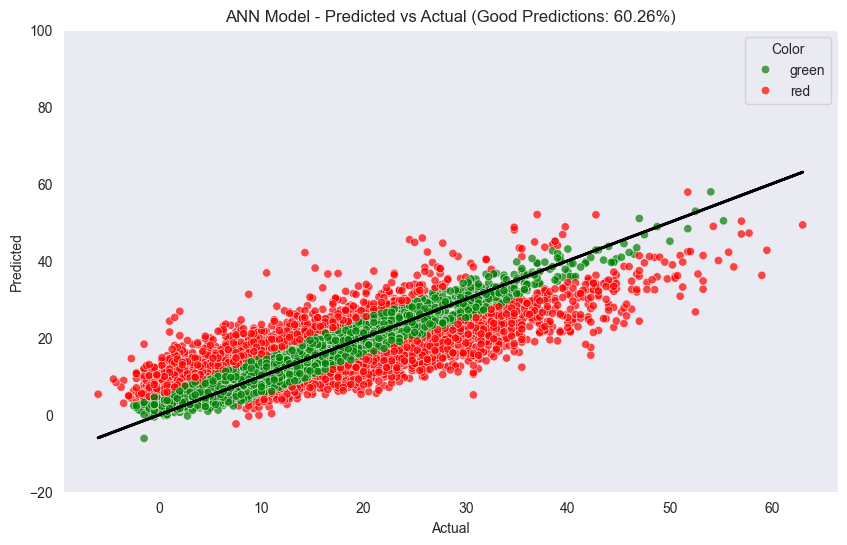

In [8]:
from Visualization.visualization import Visualization

visu_ann_dict = Visualization(ann_dict_v1, 'ANN Model')
visu_ann_dict.plot_predicted_vs_actual()

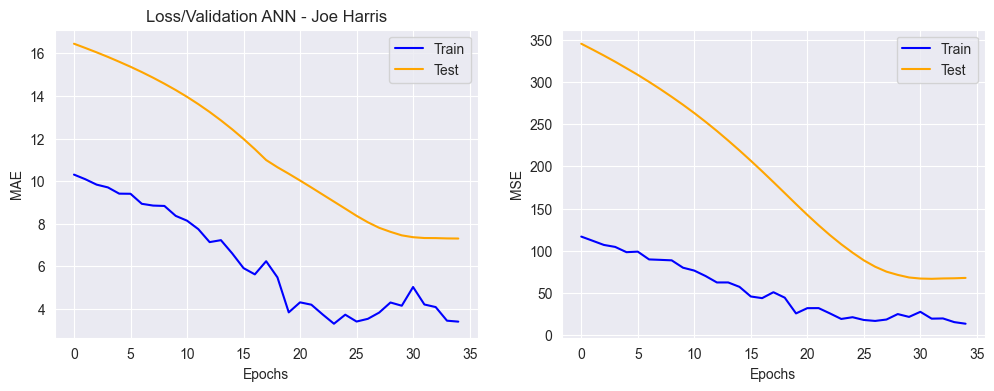

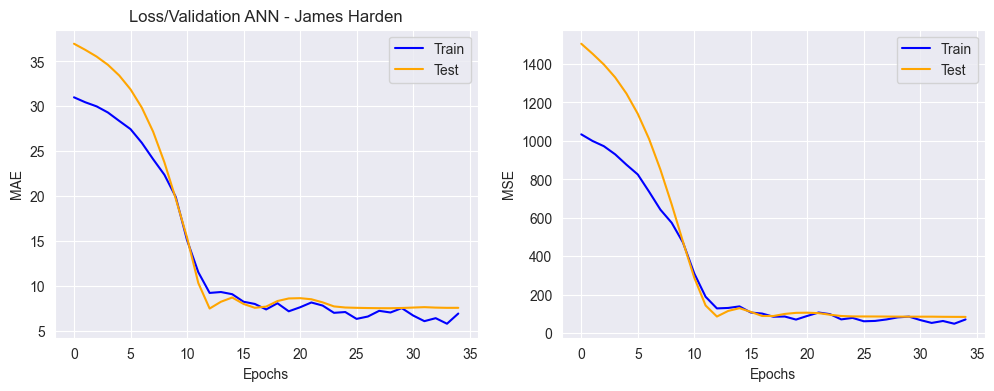

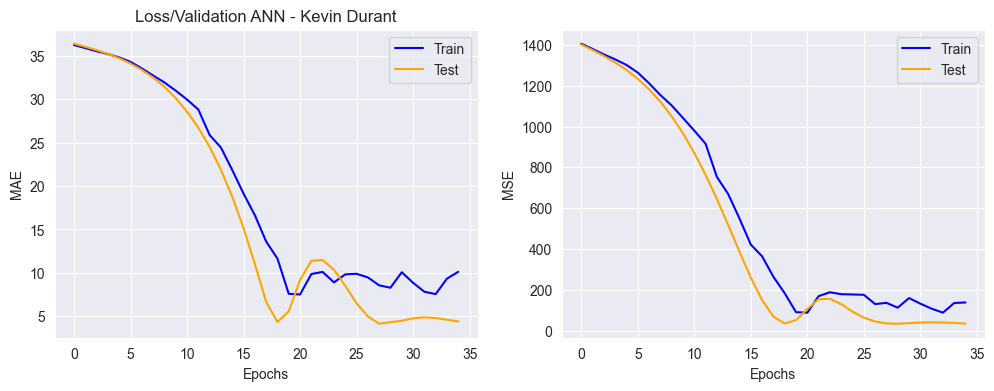

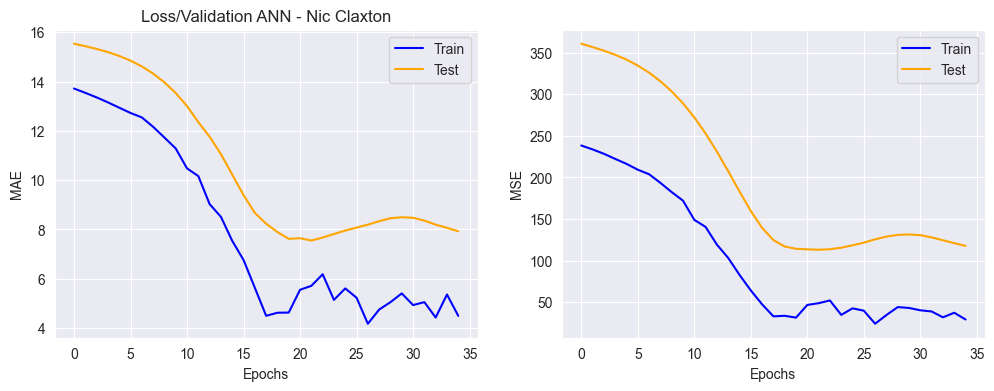

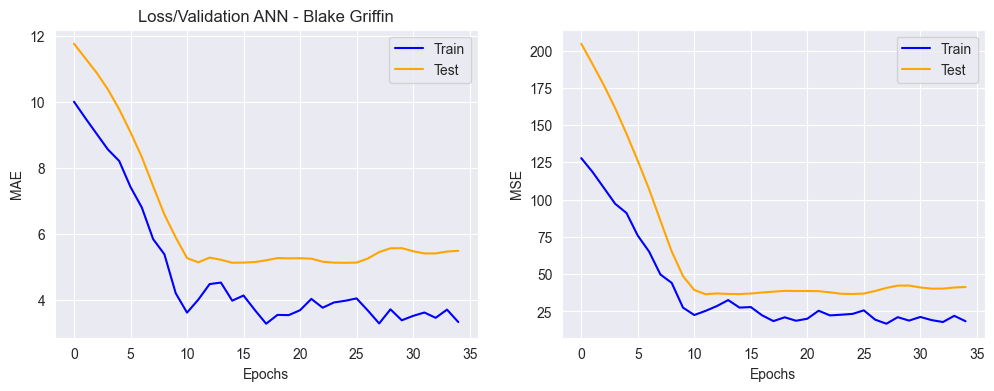

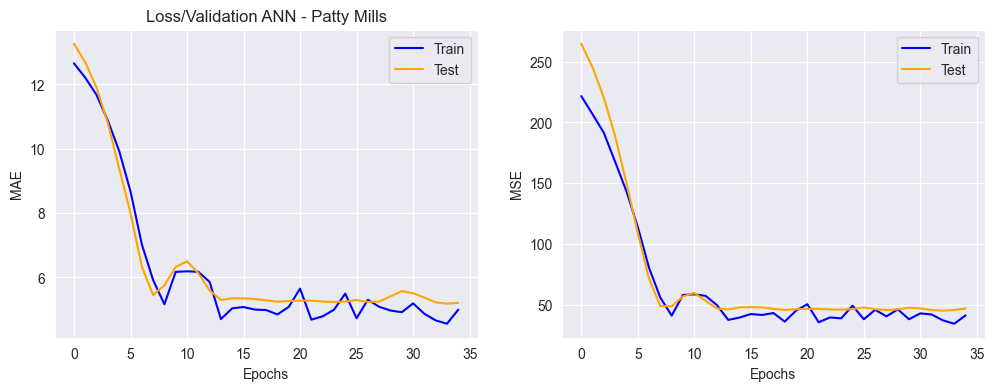

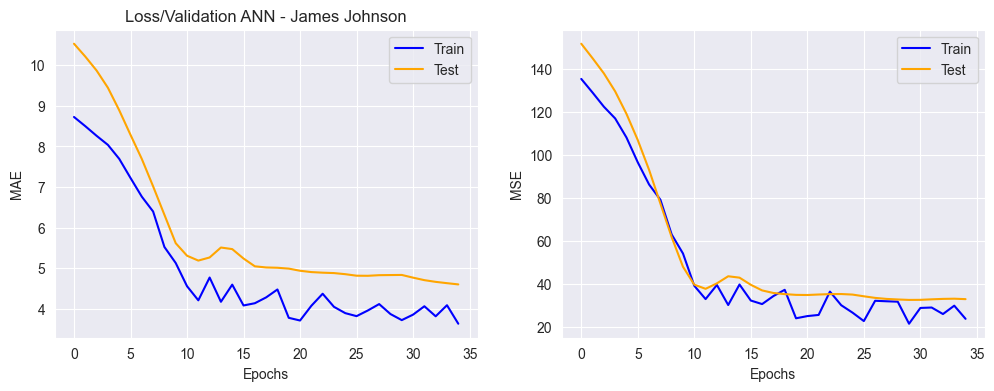

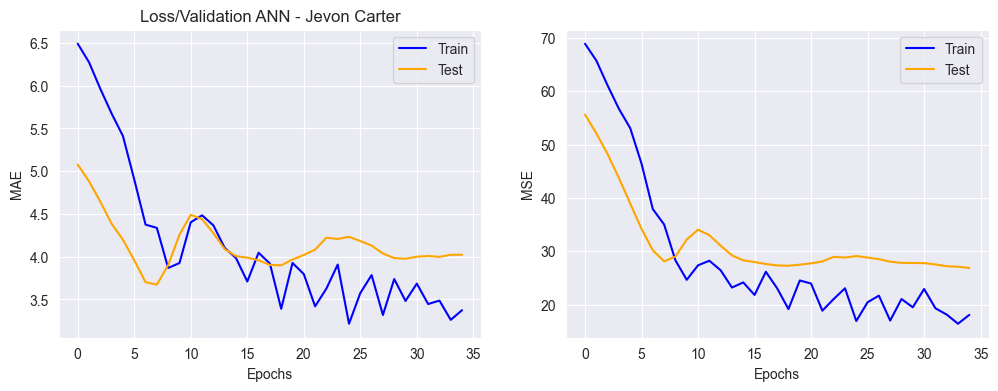

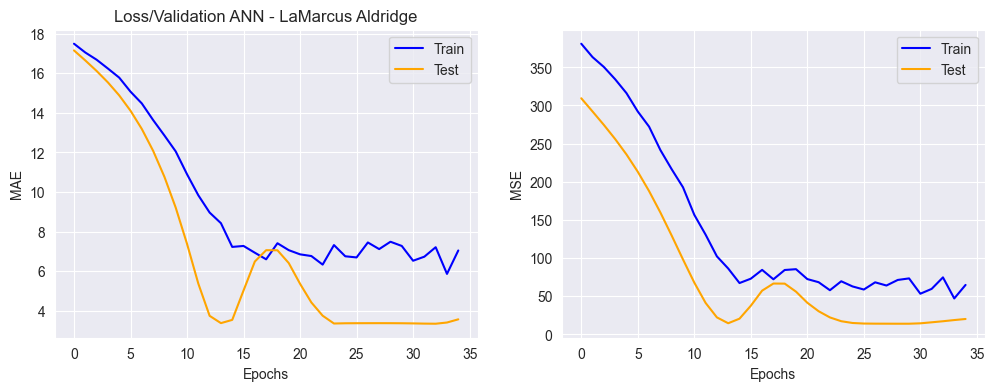

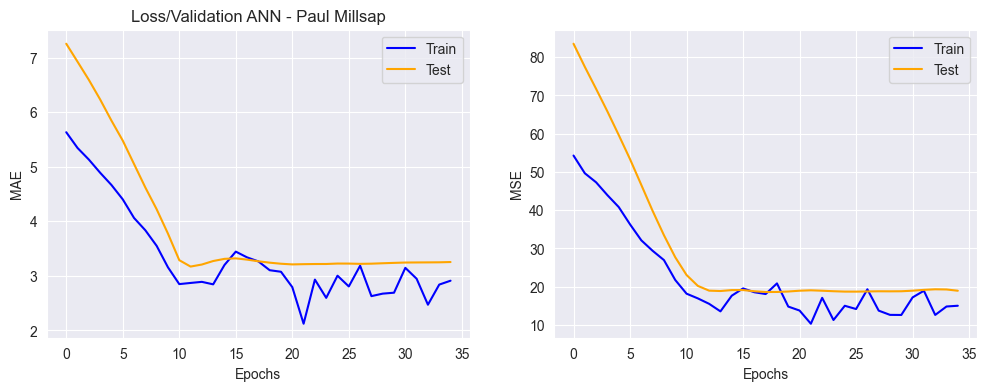

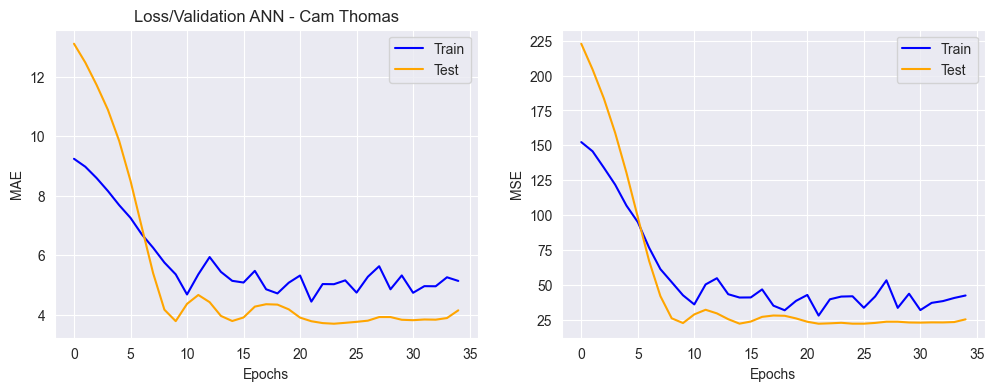

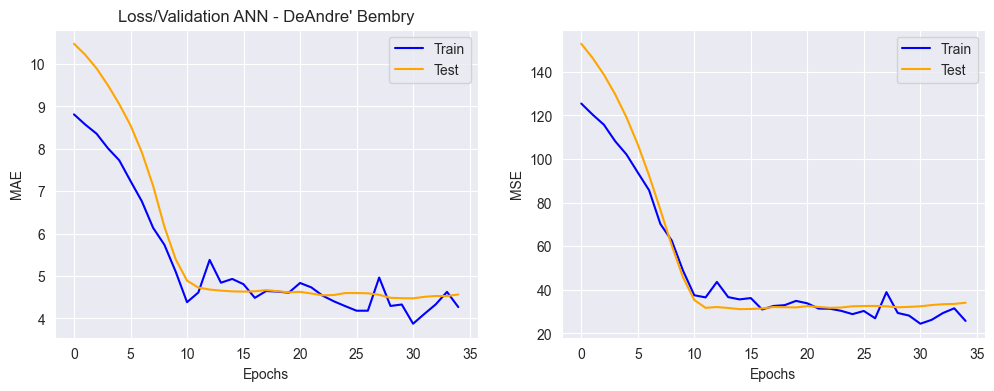

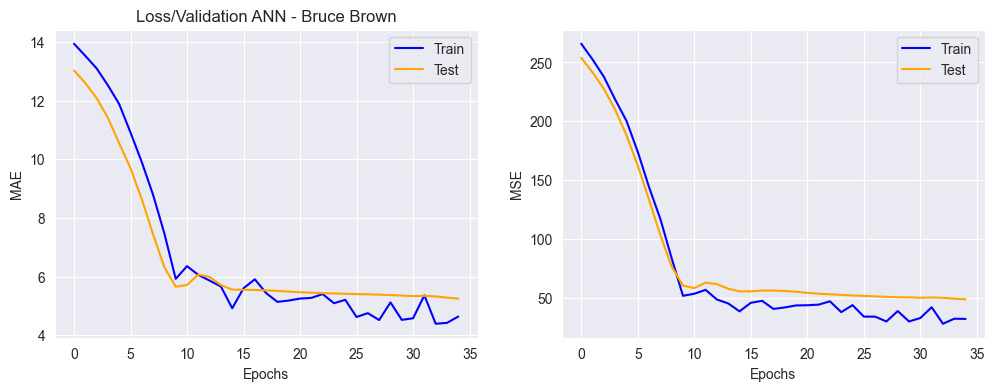

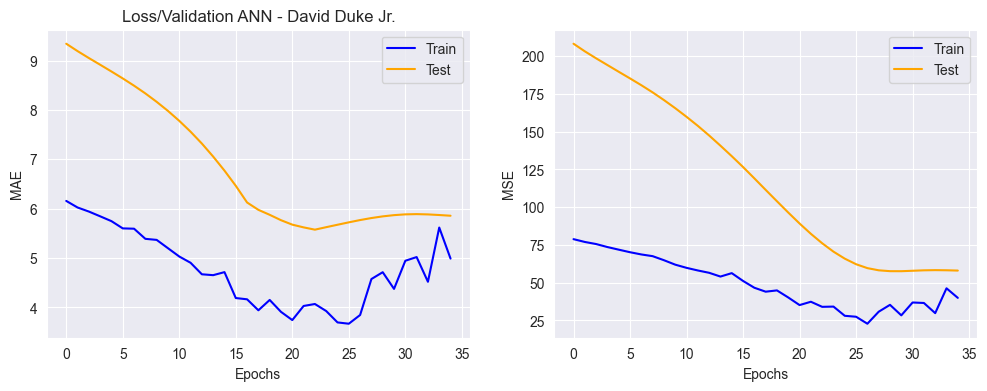

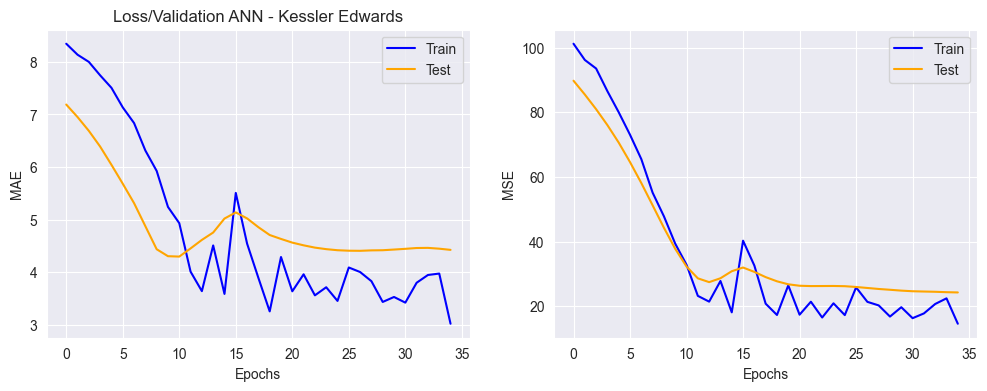

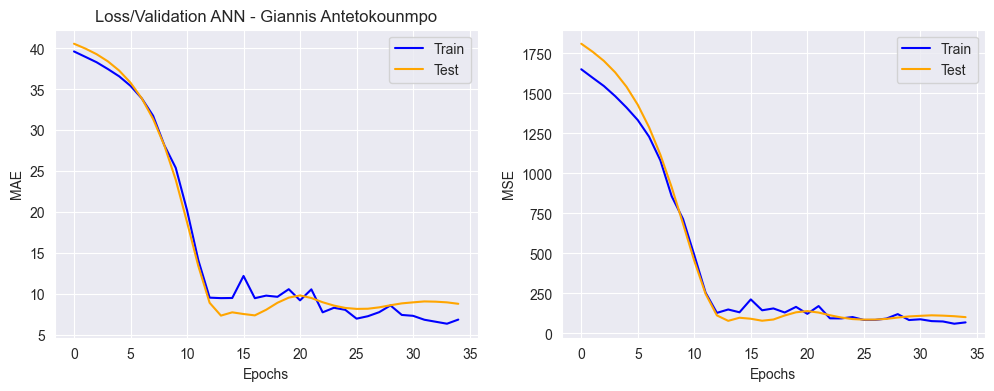

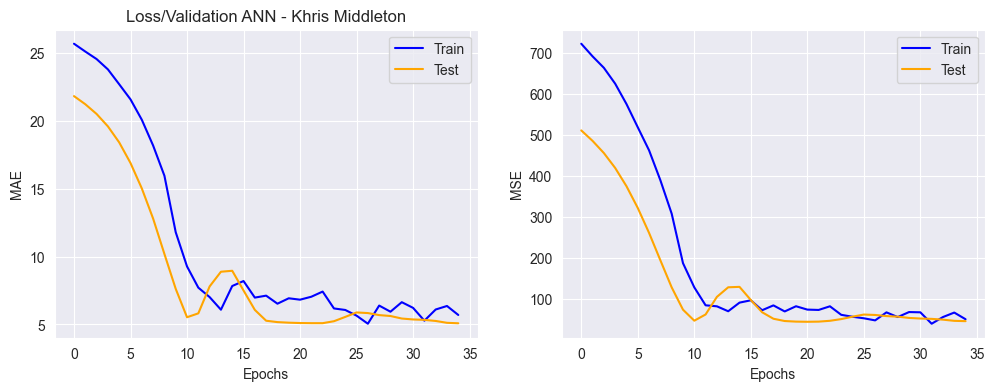

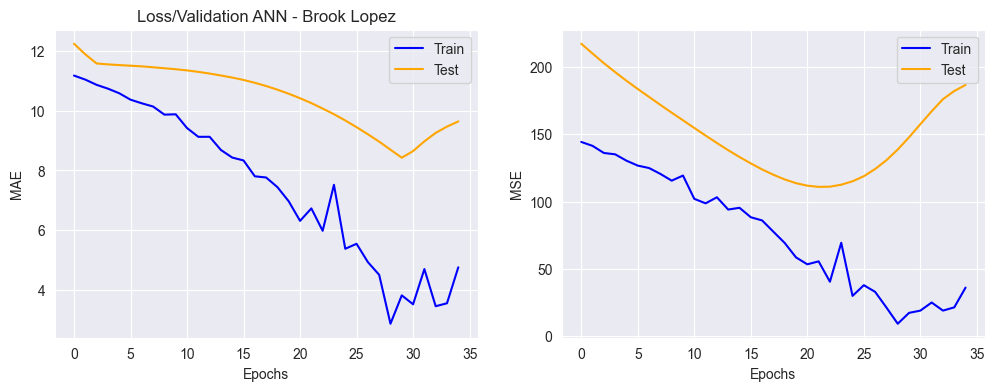

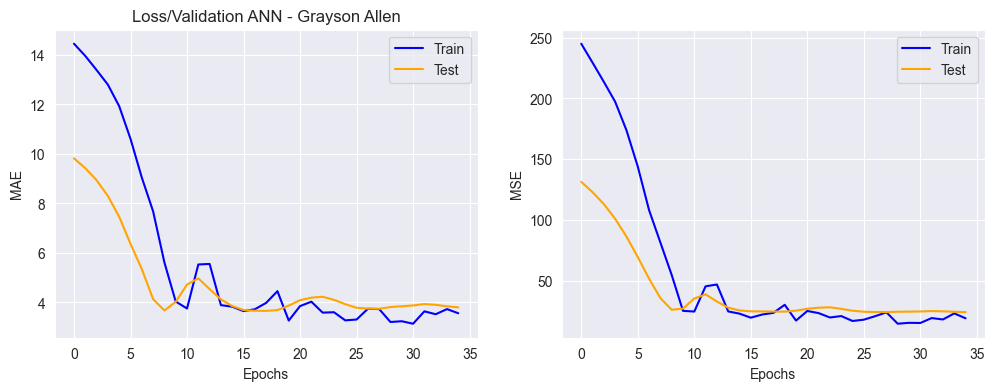

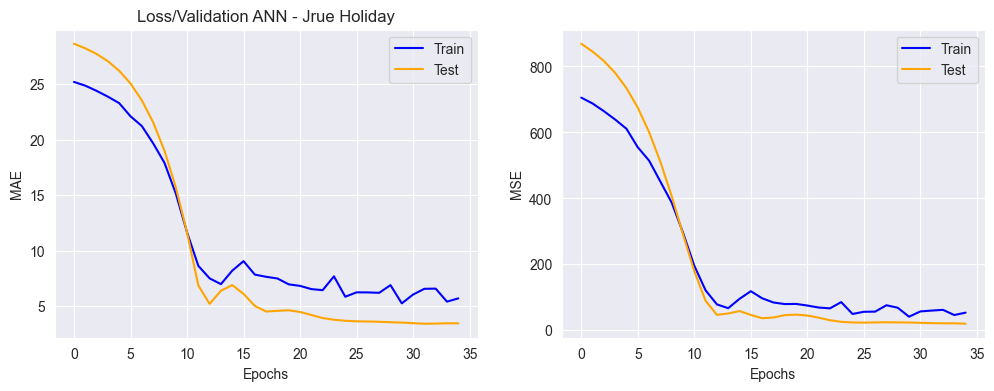

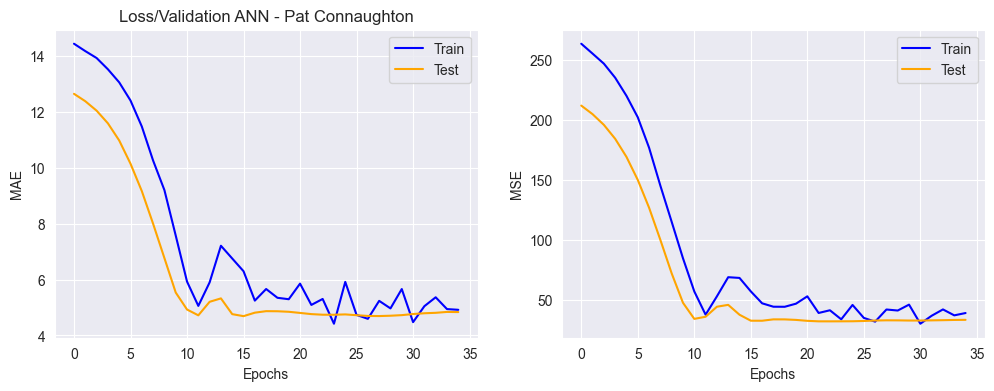

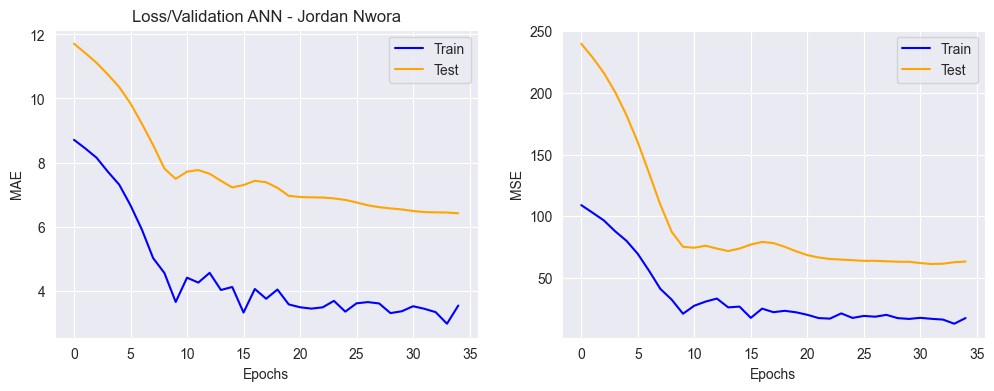

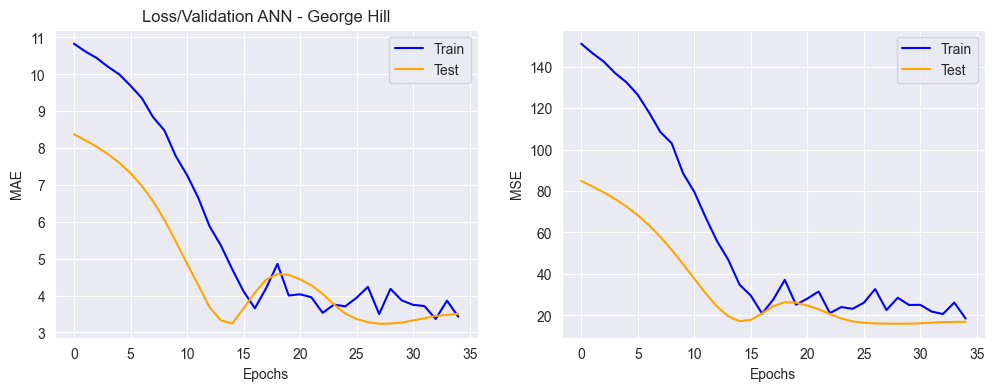

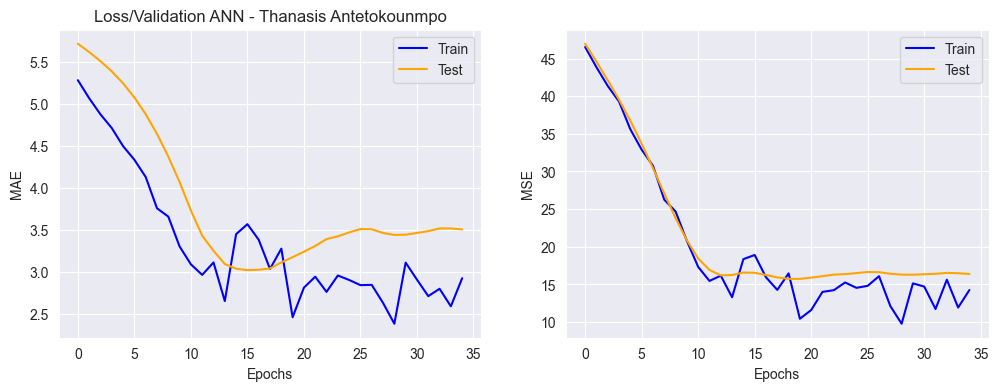

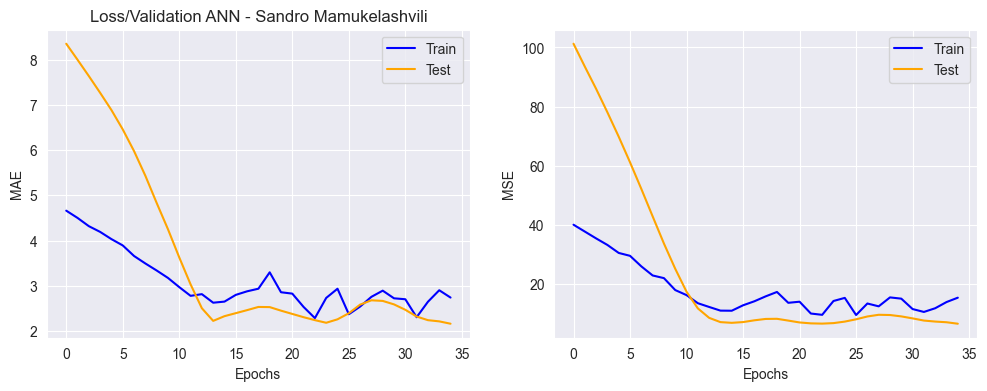

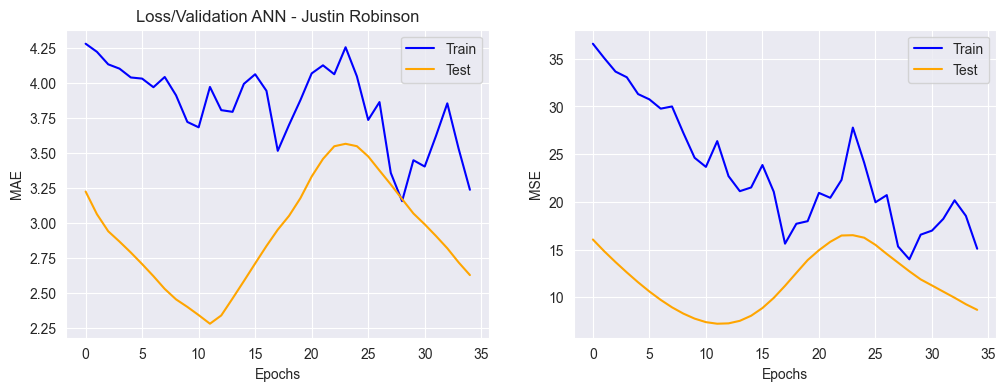

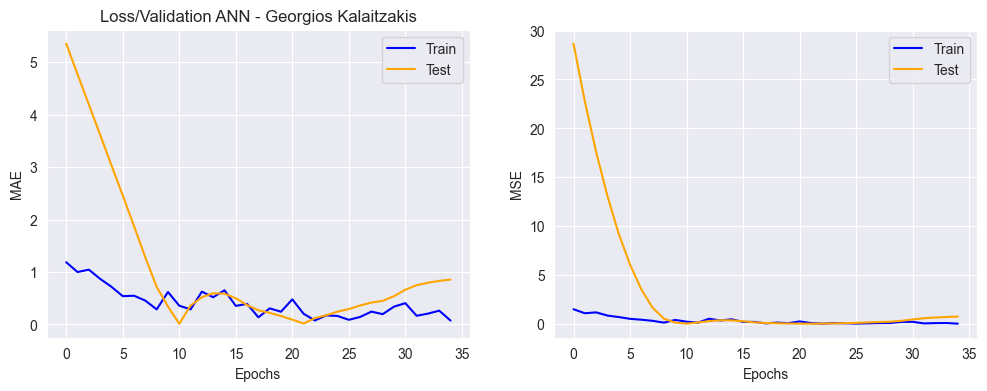

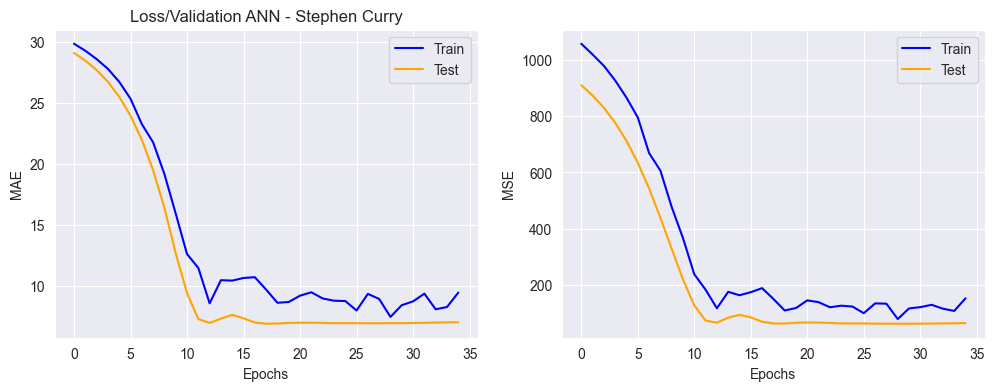

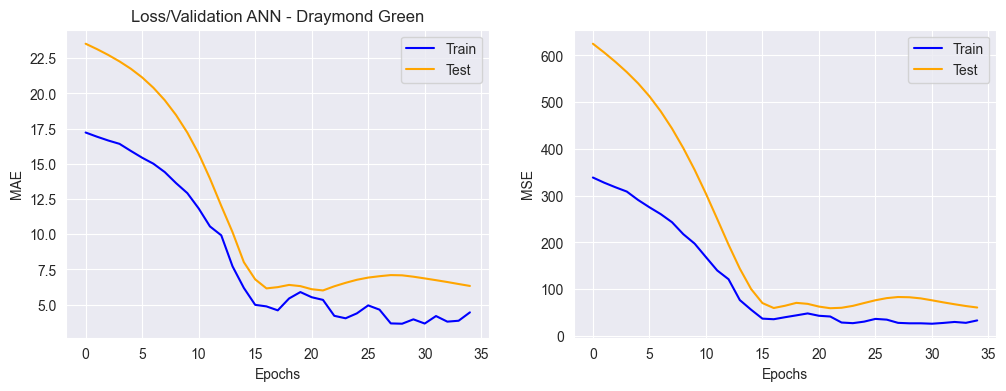

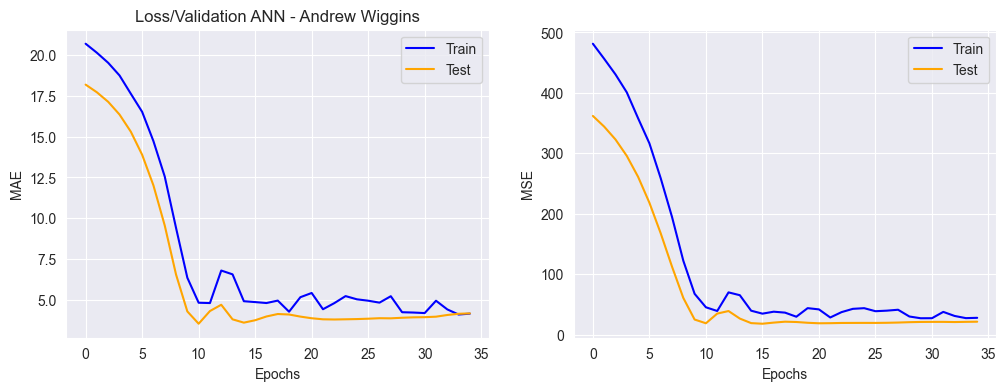

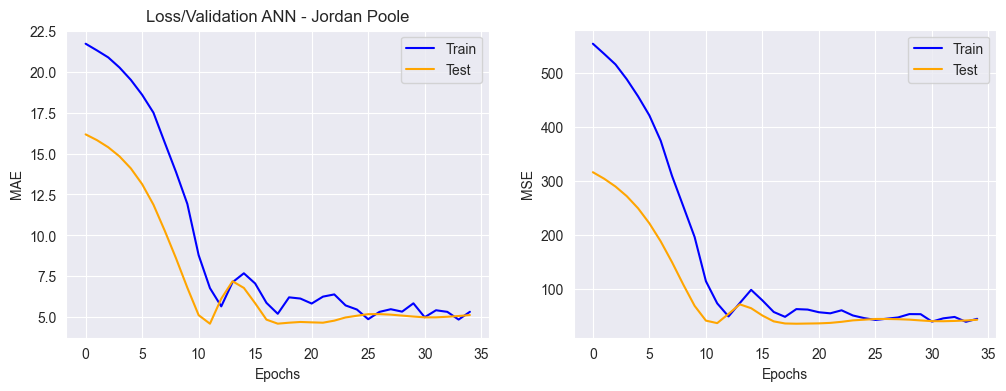

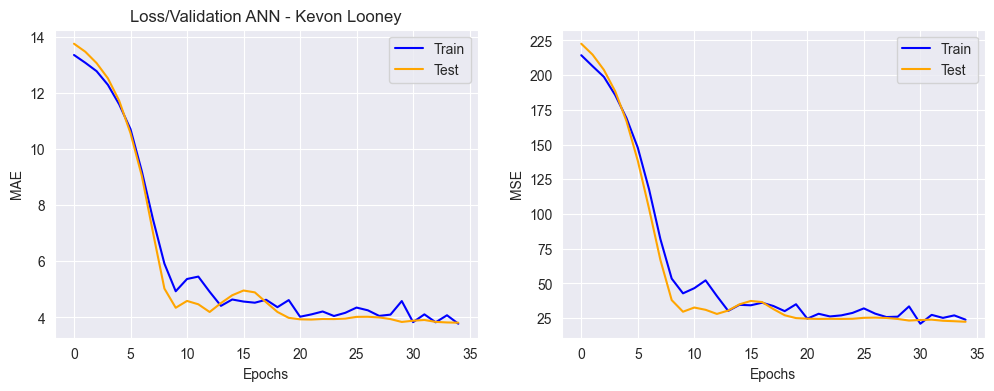

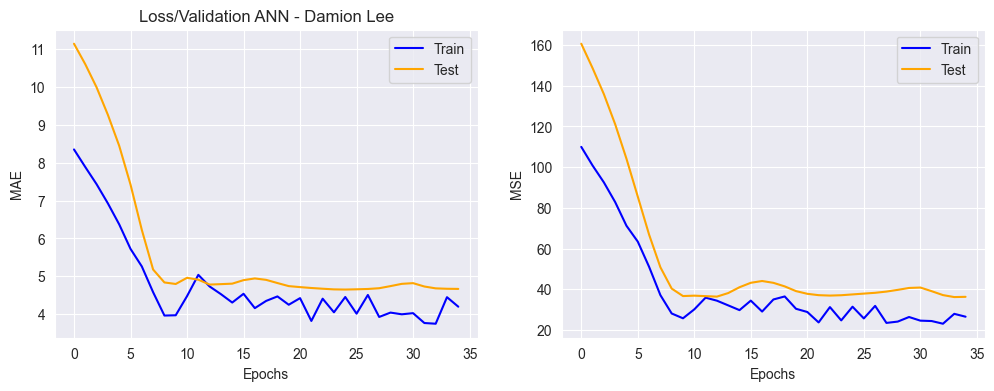

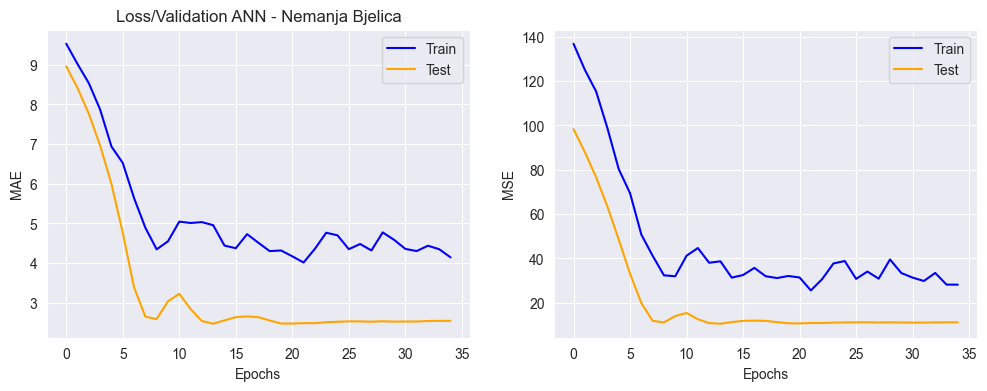

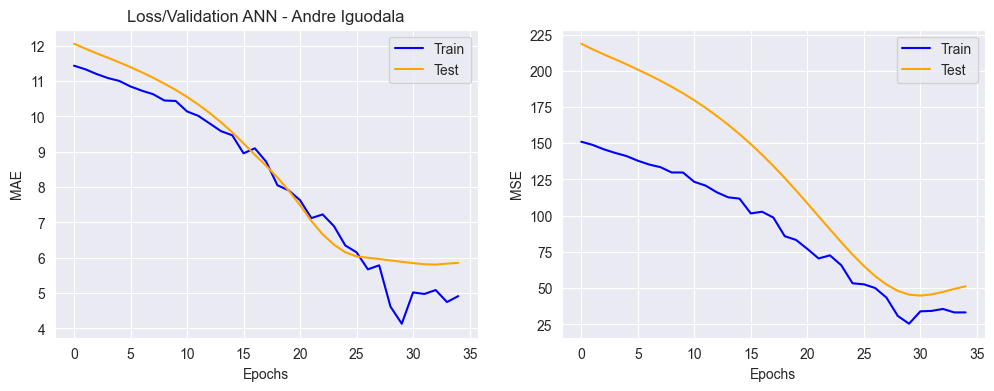

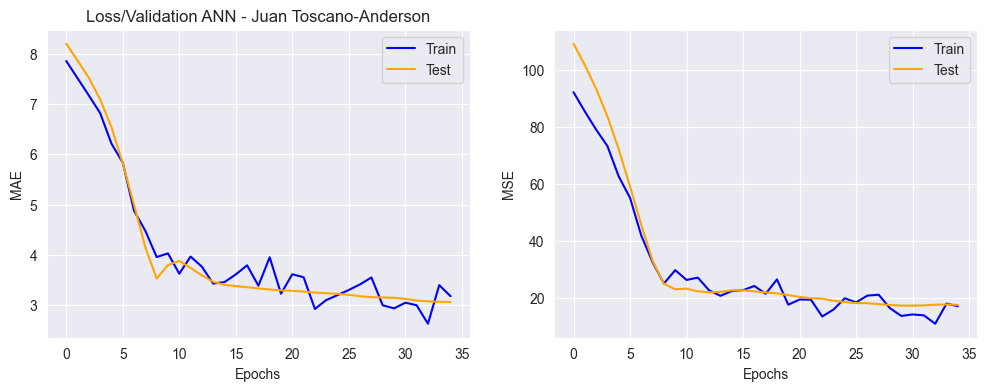

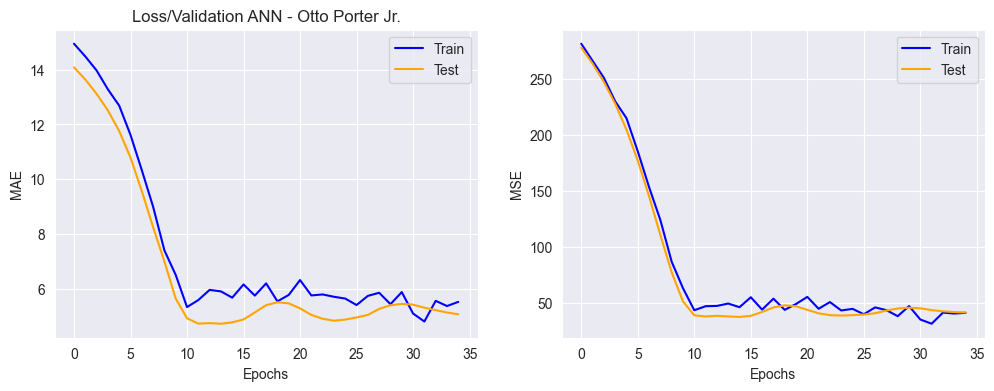

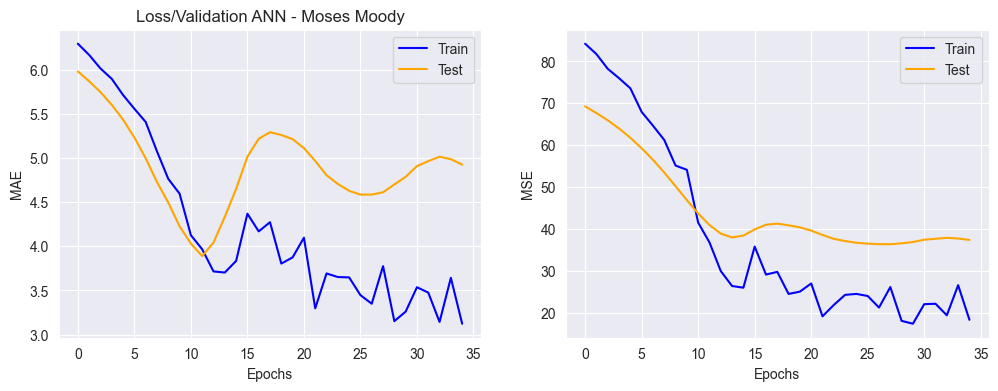

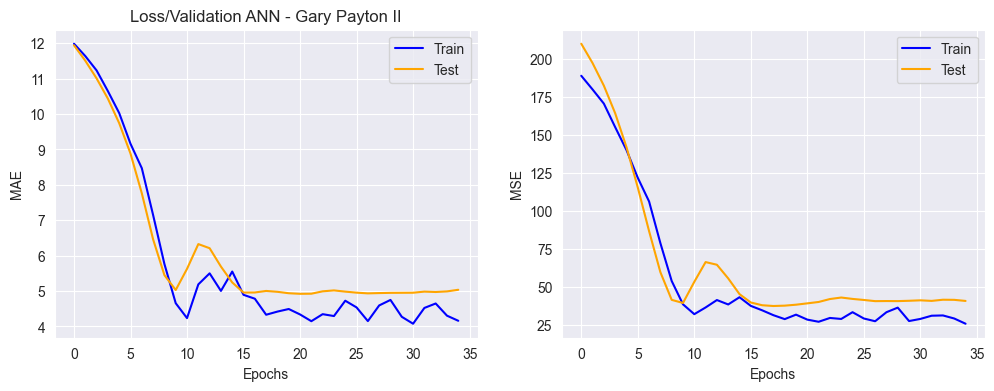

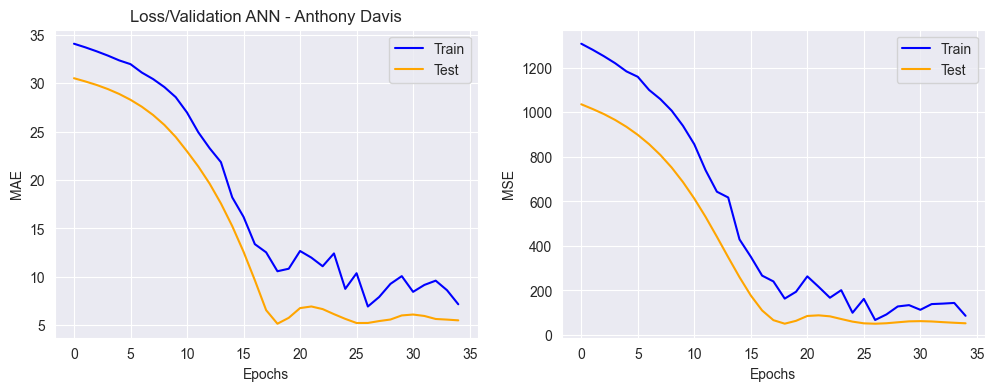

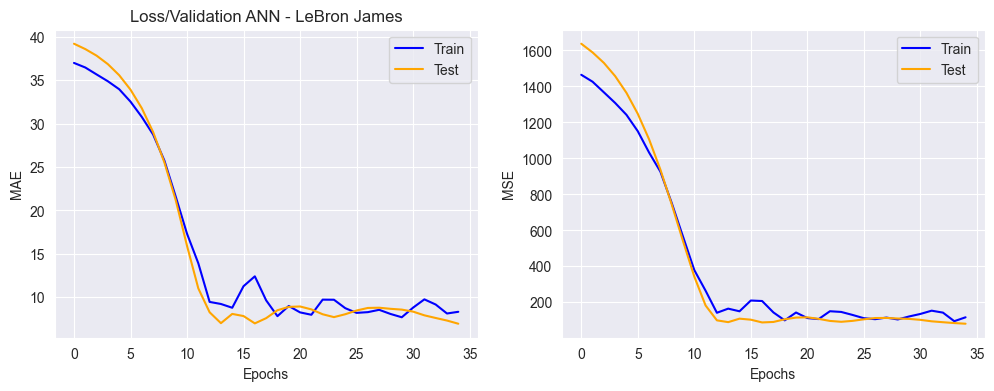

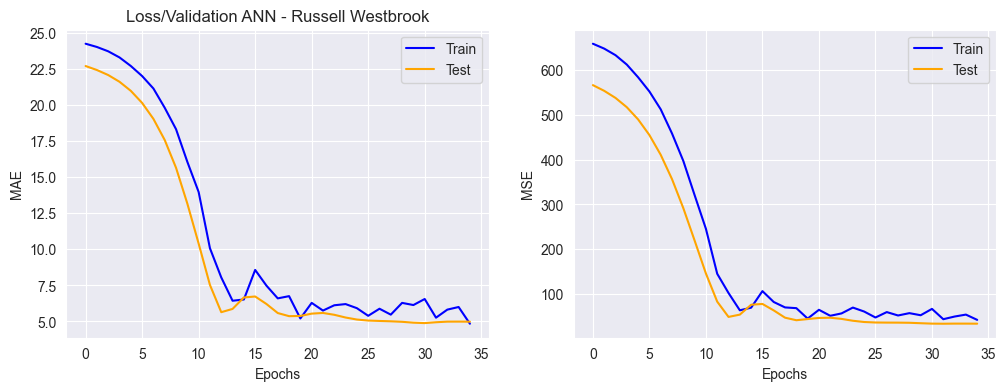

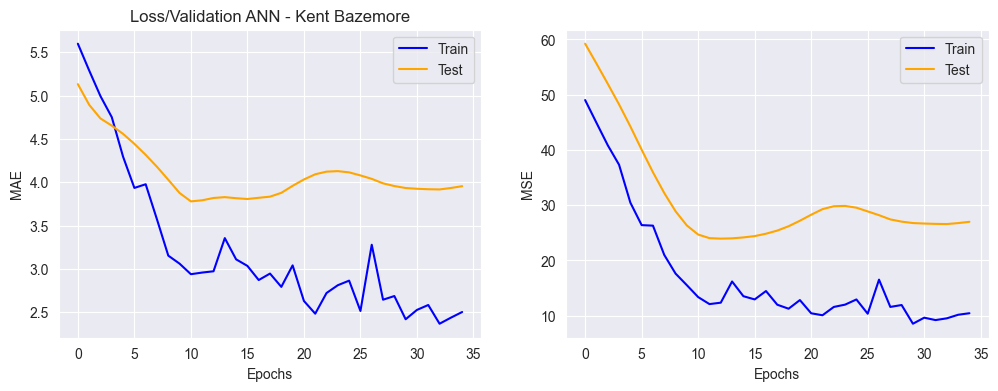

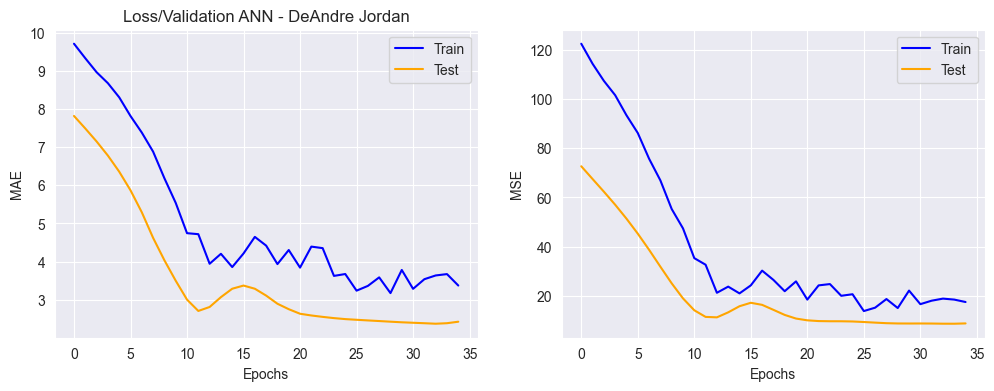

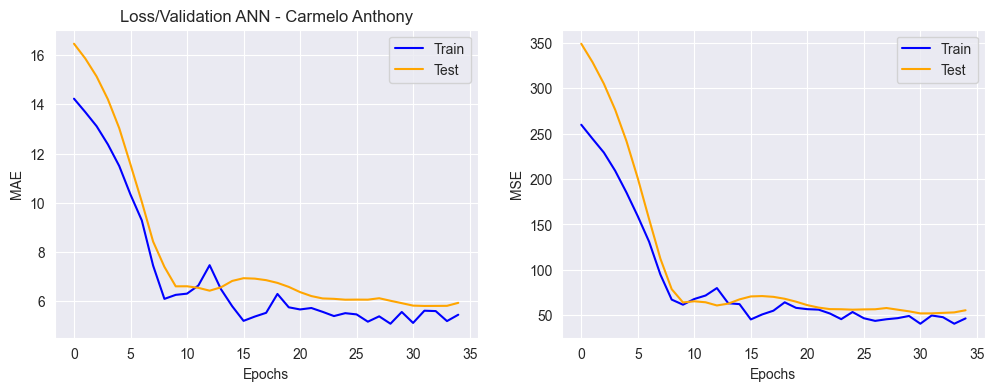

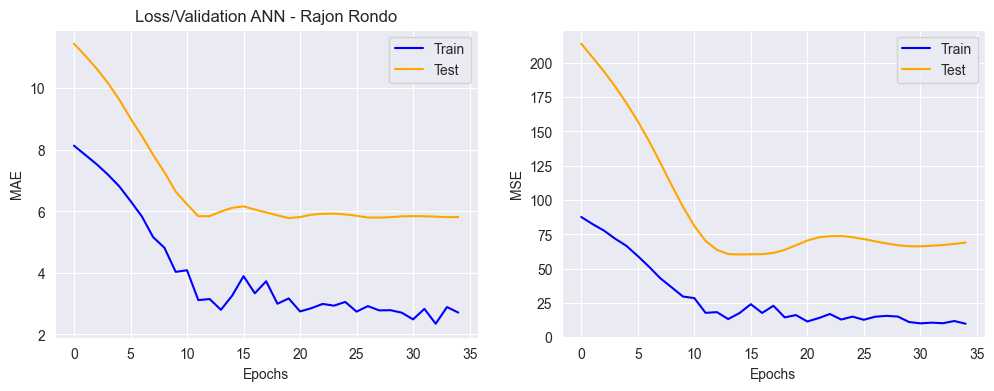

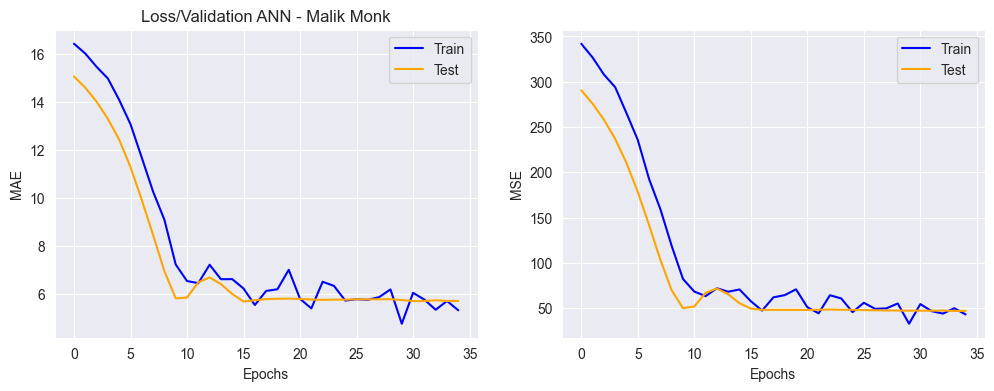

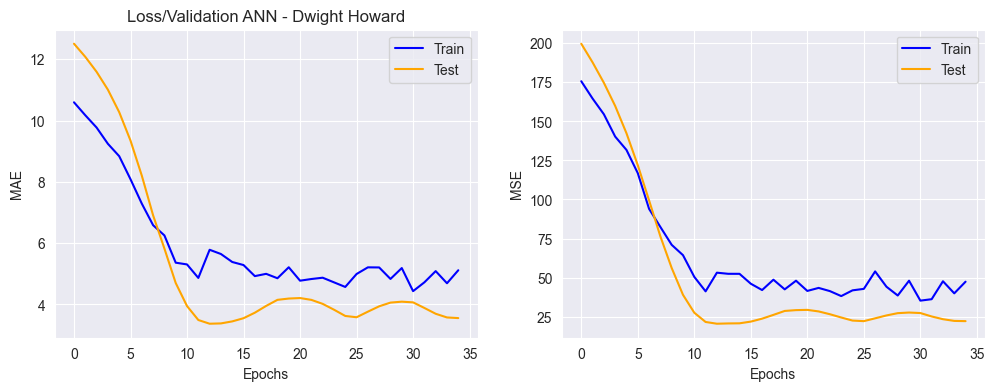

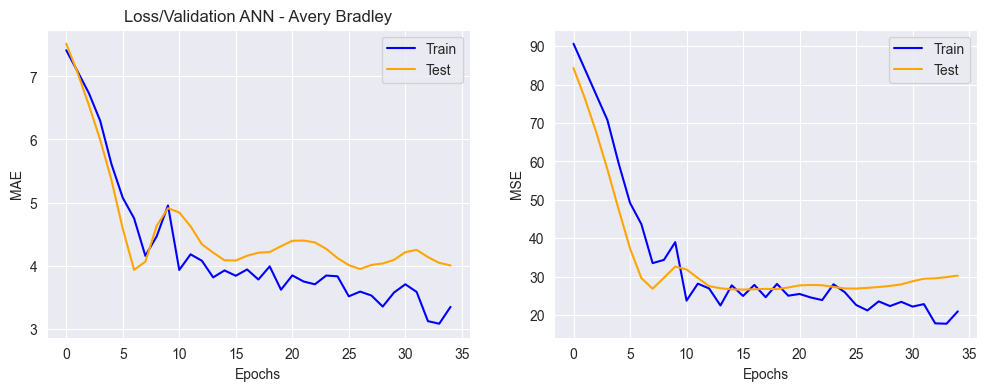

KeyError: 'Sekou Doumbouya'

In [10]:
visu_ann_dict.plot_ann_loss(players_list)

In [11]:
def plot_player_stats(df, player, type='FP'):
    import matplotlib.pyplot as plt
    import seaborn as sns
    """
    Plot any statistiques of a player during a season

    Paramètres :
    - df : season DataFrame
    - player : Player name 
    """
    # Filter
    df_player = df[df['Player'] == player]
    if df_player.empty:
        print(f"No data found for this player : {player}")
        return

    # Plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=df_player,
        x='Date',
        y=type,
        marker='o',
        color='b'
    )

    plt.title(f"{player} performance")
    plt.xlabel('Date')
    plt.ylabel(type)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

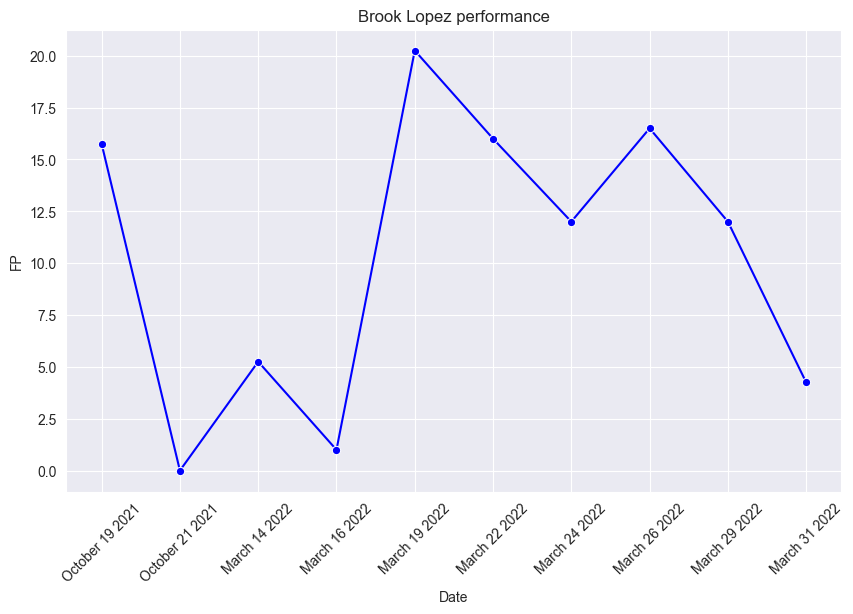

In [13]:
plot_player_stats(season21,"Brook Lopez")